In [2]:
!pip install PyWavelets

In [3]:
!pip install opencv-python

In [4]:
!pip install seaborn

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("./test_dataset/1.jpg")
img.shape

(1000, 1600, 3)

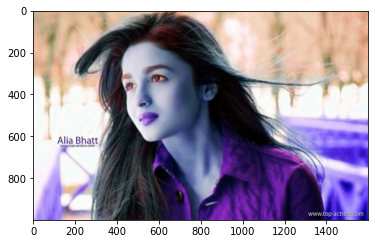

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1000, 1600)

In [5]:
gray

array([[173, 173, 173, ..., 176, 177, 177],
       [173, 173, 173, ..., 175, 176, 176],
       [172, 173, 173, ..., 174, 175, 175],
       ...,
       [221, 220, 218, ...,  74,  78,  81],
       [220, 219, 218, ...,  74,  78,  81],
       [220, 219, 217, ...,  74,  78,  81]], dtype=uint8)

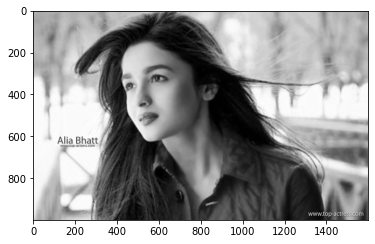

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[319, 181, 430, 430]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(319, 181, 430, 430)

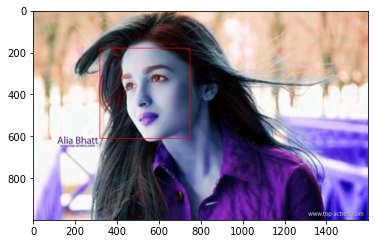

In [9]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

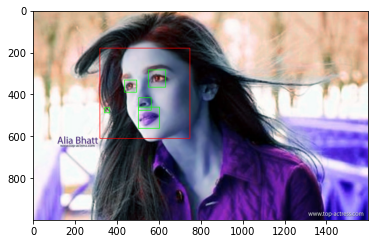

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

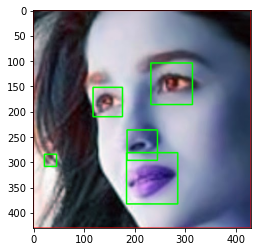

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [19]:
#function for finding the face only cropped image of any celebrity
def get_cropped_image_if_2_eye(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

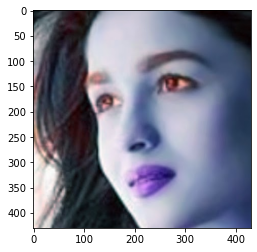

In [22]:
cropped_img = get_cropped_image_if_2_eye("./test_dataset/1.jpg")
plt.imshow(cropped_img)

In [23]:
path_to_data1 = "./dataset/dataset1/"
path_to_data2 = "./dataset/dataset2/"
path_to_data3 = "./dataset/dataset3/"
path_to_cr_data = "./dataset/cropped/"

In [24]:
#Path to all the folders present in the dataset folder
import os
img_dirs1 = []
for entry in os.scandir(path_to_data1):
    if entry.is_dir():
        img_dirs1.append(entry.path)

In [25]:
img_dirs1

['./dataset/dataset1/Aamir_Khan',
 './dataset/dataset1/Abhay_Deol',
 './dataset/dataset1/Abhishek_Bachchan',
 './dataset/dataset1/Aftab_Shivdasani',
 './dataset/dataset1/Aishwarya_Rai',
 './dataset/dataset1/Ajay_Devgn',
 './dataset/dataset1/Akshaye_Khanna',
 './dataset/dataset1/Akshay_Kumar',
 './dataset/dataset1/Alia_Bhatt',
 './dataset/dataset1/Ameesha_Patel',
 './dataset/dataset1/Amitabh_Bachchan',
 './dataset/dataset1/Amrita_Rao',
 './dataset/dataset1/Amy_Jackson',
 './dataset/dataset1/Anil_Kapoor',
 './dataset/dataset1/Anushka_Sharma',
 './dataset/dataset1/Anushka_Shetty',
 './dataset/dataset1/Arjun_Kapoor',
 './dataset/dataset1/Arjun_Rampal',
 './dataset/dataset1/Arshad_Warsi',
 './dataset/dataset1/Asin',
 './dataset/dataset1/Ayushmann_Khurrana',
 './dataset/dataset1/Bhumi_Pednekar',
 './dataset/dataset1/Bipasha_Basu',
 './dataset/dataset1/Bobby_Deol',
 './dataset/dataset1/Deepika_Padukone',
 './dataset/dataset1/Disha_Patani',
 './dataset/dataset1/Emraan_Hashmi',
 './dataset/data

In [26]:
import shutil
#create cropped folder in dataset folder
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [27]:
cropped_image_dirs = []
celebrity_file_name_dict = {}

for img_dir in img_dirs1:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_name_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        print(entry.path)
        roi_color = get_cropped_image_if_2_eye(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
#             print(cropped_folder)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_name)
            count += 1

Aamir_Khan
./dataset/dataset1/Aamir_Khan\1.jpg
Generating folder:  ./dataset/cropped/Aamir_Khan
./dataset/dataset1/Aamir_Khan\10.jpg
./dataset/dataset1/Aamir_Khan\100.jpg
./dataset/dataset1/Aamir_Khan\101.jpg
./dataset/dataset1/Aamir_Khan\102.jpg
./dataset/dataset1/Aamir_Khan\103.jpg
./dataset/dataset1/Aamir_Khan\104.jpg
./dataset/dataset1/Aamir_Khan\105.jpg
./dataset/dataset1/Aamir_Khan\106.jpg
./dataset/dataset1/Aamir_Khan\107.jpg
./dataset/dataset1/Aamir_Khan\109.jpg
./dataset/dataset1/Aamir_Khan\11.jpg
./dataset/dataset1/Aamir_Khan\110.jpg
./dataset/dataset1/Aamir_Khan\112.jpg
./dataset/dataset1/Aamir_Khan\113.jpg
./dataset/dataset1/Aamir_Khan\114.jpg
./dataset/dataset1/Aamir_Khan\115.jpg
./dataset/dataset1/Aamir_Khan\117.jpg
./dataset/dataset1/Aamir_Khan\118.jpg
./dataset/dataset1/Aamir_Khan\119.jpg
./dataset/dataset1/Aamir_Khan\12.jpg
./dataset/dataset1/Aamir_Khan\120.jpg
./dataset/dataset1/Aamir_Khan\121.jpg
./dataset/dataset1/Aamir_Khan\122.jpg
./dataset/dataset1/Aamir_Khan\123

./dataset/dataset1/Abhishek_Bachchan\103.jpg
./dataset/dataset1/Abhishek_Bachchan\104.jpg
./dataset/dataset1/Abhishek_Bachchan\105.jpg
./dataset/dataset1/Abhishek_Bachchan\106.jpg
./dataset/dataset1/Abhishek_Bachchan\11.jpg
./dataset/dataset1/Abhishek_Bachchan\12.jpg
./dataset/dataset1/Abhishek_Bachchan\13.jpg
./dataset/dataset1/Abhishek_Bachchan\14.jpg
./dataset/dataset1/Abhishek_Bachchan\15.jpg
./dataset/dataset1/Abhishek_Bachchan\16.jpg
./dataset/dataset1/Abhishek_Bachchan\17.jpg
./dataset/dataset1/Abhishek_Bachchan\18.jpg
./dataset/dataset1/Abhishek_Bachchan\19.jpg
./dataset/dataset1/Abhishek_Bachchan\2.jpg
./dataset/dataset1/Abhishek_Bachchan\20.jpg
./dataset/dataset1/Abhishek_Bachchan\21.jpg
./dataset/dataset1/Abhishek_Bachchan\22.jpg
./dataset/dataset1/Abhishek_Bachchan\23.jpg
./dataset/dataset1/Abhishek_Bachchan\24.jpg
./dataset/dataset1/Abhishek_Bachchan\25.jpg
./dataset/dataset1/Abhishek_Bachchan\26.jpg
./dataset/dataset1/Abhishek_Bachchan\27.jpg
./dataset/dataset1/Abhishek_B

./dataset/dataset1/Aftab_Shivdasani\80.jpg
./dataset/dataset1/Aftab_Shivdasani\81.jpg
./dataset/dataset1/Aftab_Shivdasani\82.jpg
./dataset/dataset1/Aftab_Shivdasani\83.jpg
./dataset/dataset1/Aftab_Shivdasani\84.jpg
./dataset/dataset1/Aftab_Shivdasani\85.jpg
./dataset/dataset1/Aftab_Shivdasani\86.jpg
./dataset/dataset1/Aftab_Shivdasani\87.jpg
./dataset/dataset1/Aftab_Shivdasani\88.jpg
./dataset/dataset1/Aftab_Shivdasani\89.jpg
./dataset/dataset1/Aftab_Shivdasani\9.jpg
./dataset/dataset1/Aftab_Shivdasani\90.jpg
./dataset/dataset1/Aftab_Shivdasani\91.jpg
./dataset/dataset1/Aftab_Shivdasani\92.jpg
./dataset/dataset1/Aftab_Shivdasani\93.jpg
./dataset/dataset1/Aftab_Shivdasani\94.jpg
./dataset/dataset1/Aftab_Shivdasani\95.jpg
./dataset/dataset1/Aftab_Shivdasani\96.jpg
./dataset/dataset1/Aftab_Shivdasani\97.jpg
./dataset/dataset1/Aftab_Shivdasani\98.jpg
./dataset/dataset1/Aftab_Shivdasani\99.jpg
Aishwarya_Rai
./dataset/dataset1/Aishwarya_Rai\1.jpg
Generating folder:  ./dataset/cropped/Aishwar

./dataset/dataset1/Ajay_Devgn\113.jpeg
./dataset/dataset1/Ajay_Devgn\114.jpg
./dataset/dataset1/Ajay_Devgn\115.jpg
./dataset/dataset1/Ajay_Devgn\116.jpg
./dataset/dataset1/Ajay_Devgn\118.jpg
./dataset/dataset1/Ajay_Devgn\12.jpg
./dataset/dataset1/Ajay_Devgn\13.jpg
./dataset/dataset1/Ajay_Devgn\14.jpg
./dataset/dataset1/Ajay_Devgn\16.jpg
./dataset/dataset1/Ajay_Devgn\17.jpg
./dataset/dataset1/Ajay_Devgn\18.jpeg
./dataset/dataset1/Ajay_Devgn\19.jpg
./dataset/dataset1/Ajay_Devgn\2.jpg
./dataset/dataset1/Ajay_Devgn\20.jpg
./dataset/dataset1/Ajay_Devgn\21.jpg
./dataset/dataset1/Ajay_Devgn\22.jpg
./dataset/dataset1/Ajay_Devgn\23.jpg
./dataset/dataset1/Ajay_Devgn\24.jpg
./dataset/dataset1/Ajay_Devgn\25.jpg
./dataset/dataset1/Ajay_Devgn\26.jpg
./dataset/dataset1/Ajay_Devgn\27.jpg
./dataset/dataset1/Ajay_Devgn\28.jpg
./dataset/dataset1/Ajay_Devgn\29.jpg
./dataset/dataset1/Ajay_Devgn\3.jpg
./dataset/dataset1/Ajay_Devgn\30.jpg
./dataset/dataset1/Ajay_Devgn\31.jpg
./dataset/dataset1/Ajay_Devgn\32.

./dataset/dataset1/Akshay_Kumar\119.jpg
./dataset/dataset1/Akshay_Kumar\12.jpg
./dataset/dataset1/Akshay_Kumar\120.jpg
./dataset/dataset1/Akshay_Kumar\121.png
./dataset/dataset1/Akshay_Kumar\122.jpg
./dataset/dataset1/Akshay_Kumar\123.jpg
./dataset/dataset1/Akshay_Kumar\124.jpg
./dataset/dataset1/Akshay_Kumar\125.jpg
./dataset/dataset1/Akshay_Kumar\126.jpg
./dataset/dataset1/Akshay_Kumar\127.jpg
./dataset/dataset1/Akshay_Kumar\128.jpg
./dataset/dataset1/Akshay_Kumar\13.jpg
./dataset/dataset1/Akshay_Kumar\14.jpeg
./dataset/dataset1/Akshay_Kumar\15.jpg
./dataset/dataset1/Akshay_Kumar\16.jpg
./dataset/dataset1/Akshay_Kumar\17.jpg
./dataset/dataset1/Akshay_Kumar\18.jpg
./dataset/dataset1/Akshay_Kumar\19.jpg
./dataset/dataset1/Akshay_Kumar\2.jpg
./dataset/dataset1/Akshay_Kumar\20.jpg
./dataset/dataset1/Akshay_Kumar\21.jpg
./dataset/dataset1/Akshay_Kumar\22.png
./dataset/dataset1/Akshay_Kumar\24.jpg
./dataset/dataset1/Akshay_Kumar\25.jpg
./dataset/dataset1/Akshay_Kumar\26.jpg
./dataset/datas

./dataset/dataset1/Alia_Bhatt\49.jpg
./dataset/dataset1/Alia_Bhatt\5.jpg
./dataset/dataset1/Alia_Bhatt\50.jpg
./dataset/dataset1/Alia_Bhatt\51.jpg
./dataset/dataset1/Alia_Bhatt\52.jpg
./dataset/dataset1/Alia_Bhatt\53.jpg
./dataset/dataset1/Alia_Bhatt\54.jpg
./dataset/dataset1/Alia_Bhatt\55.jpg
./dataset/dataset1/Alia_Bhatt\56.jpg
./dataset/dataset1/Alia_Bhatt\57.jpg
./dataset/dataset1/Alia_Bhatt\58.jpg
./dataset/dataset1/Alia_Bhatt\59.jpg
./dataset/dataset1/Alia_Bhatt\6.jpg
./dataset/dataset1/Alia_Bhatt\60.jpg
./dataset/dataset1/Alia_Bhatt\61.jpg
./dataset/dataset1/Alia_Bhatt\62.jpg
./dataset/dataset1/Alia_Bhatt\63.jpg
./dataset/dataset1/Alia_Bhatt\64.jpeg
./dataset/dataset1/Alia_Bhatt\65.jpg
./dataset/dataset1/Alia_Bhatt\66.jpg
./dataset/dataset1/Alia_Bhatt\67.jpg
./dataset/dataset1/Alia_Bhatt\68.jpg
./dataset/dataset1/Alia_Bhatt\69.jpg
./dataset/dataset1/Alia_Bhatt\7.jpg
./dataset/dataset1/Alia_Bhatt\70.jpg
./dataset/dataset1/Alia_Bhatt\71.jpg
./dataset/dataset1/Alia_Bhatt\72.jpg
./d

./dataset/dataset1/Amitabh_Bachchan\128.jpg
./dataset/dataset1/Amitabh_Bachchan\129.jpg
./dataset/dataset1/Amitabh_Bachchan\13.jpg
./dataset/dataset1/Amitabh_Bachchan\130.jpg
./dataset/dataset1/Amitabh_Bachchan\131.jpg
./dataset/dataset1/Amitabh_Bachchan\132.jpg
./dataset/dataset1/Amitabh_Bachchan\133.jpg
./dataset/dataset1/Amitabh_Bachchan\134.jpg
./dataset/dataset1/Amitabh_Bachchan\135.jpg
./dataset/dataset1/Amitabh_Bachchan\136.jpg
./dataset/dataset1/Amitabh_Bachchan\137.jpg
./dataset/dataset1/Amitabh_Bachchan\14.jpg
./dataset/dataset1/Amitabh_Bachchan\15.jpg
./dataset/dataset1/Amitabh_Bachchan\16.jpg
./dataset/dataset1/Amitabh_Bachchan\17.jpg
./dataset/dataset1/Amitabh_Bachchan\18.jpg
./dataset/dataset1/Amitabh_Bachchan\19.jpg
./dataset/dataset1/Amitabh_Bachchan\2.jpg
./dataset/dataset1/Amitabh_Bachchan\20.jpg
./dataset/dataset1/Amitabh_Bachchan\22.jpg
./dataset/dataset1/Amitabh_Bachchan\23.jpg
./dataset/dataset1/Amitabh_Bachchan\24.jpg
./dataset/dataset1/Amitabh_Bachchan\25.jpg
./

./dataset/dataset1/Amrita_Rao\79.jpg
./dataset/dataset1/Amrita_Rao\8.jpg
./dataset/dataset1/Amrita_Rao\80.jpg
./dataset/dataset1/Amrita_Rao\82.jpg
./dataset/dataset1/Amrita_Rao\83.jpg
./dataset/dataset1/Amrita_Rao\84.jpg
./dataset/dataset1/Amrita_Rao\85.jpg
./dataset/dataset1/Amrita_Rao\86.jpg
./dataset/dataset1/Amrita_Rao\87.jpg
./dataset/dataset1/Amrita_Rao\88.jpg
./dataset/dataset1/Amrita_Rao\89.jpg
./dataset/dataset1/Amrita_Rao\9.jpg
./dataset/dataset1/Amrita_Rao\90.jpg
./dataset/dataset1/Amrita_Rao\91.jpg
./dataset/dataset1/Amrita_Rao\92.jpg
./dataset/dataset1/Amrita_Rao\93.jpg
./dataset/dataset1/Amrita_Rao\94.jpg
./dataset/dataset1/Amrita_Rao\95.jpg
./dataset/dataset1/Amrita_Rao\96.jpg
./dataset/dataset1/Amrita_Rao\97.jpg
./dataset/dataset1/Amrita_Rao\98.jpg
./dataset/dataset1/Amrita_Rao\99.jpg
Amy_Jackson
./dataset/dataset1/Amy_Jackson\1.jpg
Generating folder:  ./dataset/cropped/Amy_Jackson
./dataset/dataset1/Amy_Jackson\10.jpg
./dataset/dataset1/Amy_Jackson\100.jpg
./dataset/da

./dataset/dataset1/Anil_Kapoor\65.jpg
./dataset/dataset1/Anil_Kapoor\66.jpeg
./dataset/dataset1/Anil_Kapoor\67.jpg
./dataset/dataset1/Anil_Kapoor\68.jpg
./dataset/dataset1/Anil_Kapoor\69.jpg
./dataset/dataset1/Anil_Kapoor\7.jpg
./dataset/dataset1/Anil_Kapoor\70.jpg
./dataset/dataset1/Anil_Kapoor\71.jpg
./dataset/dataset1/Anil_Kapoor\72.jpg
./dataset/dataset1/Anil_Kapoor\73.jpg
./dataset/dataset1/Anil_Kapoor\74.jpg
./dataset/dataset1/Anil_Kapoor\75.jpg
./dataset/dataset1/Anil_Kapoor\76.jpg
./dataset/dataset1/Anil_Kapoor\77.jpg
./dataset/dataset1/Anil_Kapoor\78.jpg
./dataset/dataset1/Anil_Kapoor\79.jpg
./dataset/dataset1/Anil_Kapoor\8.jpg
./dataset/dataset1/Anil_Kapoor\80.jpg
./dataset/dataset1/Anil_Kapoor\81.jpeg
./dataset/dataset1/Anil_Kapoor\82.jpg
./dataset/dataset1/Anil_Kapoor\83.jpg
./dataset/dataset1/Anil_Kapoor\84.jpg
./dataset/dataset1/Anil_Kapoor\85.jpg
./dataset/dataset1/Anil_Kapoor\86.jpg
./dataset/dataset1/Anil_Kapoor\87.jpg
./dataset/dataset1/Anil_Kapoor\88.jpg
./dataset/da

./dataset/dataset1/Anushka_Sharma\91.jpeg
./dataset/dataset1/Anushka_Sharma\92.jpg
./dataset/dataset1/Anushka_Sharma\93.jpg
./dataset/dataset1/Anushka_Sharma\94.jpg
./dataset/dataset1/Anushka_Sharma\95.jpg
./dataset/dataset1/Anushka_Sharma\96.jpg
./dataset/dataset1/Anushka_Sharma\97.jpg
./dataset/dataset1/Anushka_Sharma\98.jpg
./dataset/dataset1/Anushka_Sharma\99.jpg
Anushka_Shetty
./dataset/dataset1/Anushka_Shetty\1.jpg
Generating folder:  ./dataset/cropped/Anushka_Shetty
./dataset/dataset1/Anushka_Shetty\10.jpg
./dataset/dataset1/Anushka_Shetty\100.jpg
./dataset/dataset1/Anushka_Shetty\101.jpg
./dataset/dataset1/Anushka_Shetty\102.jpg
./dataset/dataset1/Anushka_Shetty\103.jpg
./dataset/dataset1/Anushka_Shetty\104.jpg
./dataset/dataset1/Anushka_Shetty\105.jpg
./dataset/dataset1/Anushka_Shetty\106.jpg
./dataset/dataset1/Anushka_Shetty\107.jpg
./dataset/dataset1/Anushka_Shetty\108.jpg
./dataset/dataset1/Anushka_Shetty\109.jpg
./dataset/dataset1/Anushka_Shetty\11.jpg
./dataset/dataset1/A

./dataset/dataset1/Arjun_Kapoor\33.jpg
./dataset/dataset1/Arjun_Kapoor\34.jpg
./dataset/dataset1/Arjun_Kapoor\35.jpg
./dataset/dataset1/Arjun_Kapoor\36.jpg
./dataset/dataset1/Arjun_Kapoor\37.jpg
./dataset/dataset1/Arjun_Kapoor\38.jpg
./dataset/dataset1/Arjun_Kapoor\39.jpg
./dataset/dataset1/Arjun_Kapoor\4.jpg
./dataset/dataset1/Arjun_Kapoor\40.jpg
./dataset/dataset1/Arjun_Kapoor\41.jpg
./dataset/dataset1/Arjun_Kapoor\42.jpg
./dataset/dataset1/Arjun_Kapoor\43.jpg
./dataset/dataset1/Arjun_Kapoor\44.jpg
./dataset/dataset1/Arjun_Kapoor\45.jpg
./dataset/dataset1/Arjun_Kapoor\46.jpg
./dataset/dataset1/Arjun_Kapoor\47.jpg
./dataset/dataset1/Arjun_Kapoor\48.jpg
./dataset/dataset1/Arjun_Kapoor\49.jpg
./dataset/dataset1/Arjun_Kapoor\5.jpg
./dataset/dataset1/Arjun_Kapoor\50.jpg
./dataset/dataset1/Arjun_Kapoor\51.jpg
./dataset/dataset1/Arjun_Kapoor\52.jpg
./dataset/dataset1/Arjun_Kapoor\53.jpg
./dataset/dataset1/Arjun_Kapoor\54.jpg
./dataset/dataset1/Arjun_Kapoor\55.jpg
./dataset/dataset1/Arjun_Ka

./dataset/dataset1/Arshad_Warsi\32.jpg
./dataset/dataset1/Arshad_Warsi\33.jpg
./dataset/dataset1/Arshad_Warsi\34.jpg
./dataset/dataset1/Arshad_Warsi\35.jpg
./dataset/dataset1/Arshad_Warsi\36.jpg
./dataset/dataset1/Arshad_Warsi\37.jpg
./dataset/dataset1/Arshad_Warsi\38.jpg
./dataset/dataset1/Arshad_Warsi\39.jpg
./dataset/dataset1/Arshad_Warsi\4.jpg
./dataset/dataset1/Arshad_Warsi\40.jpg
./dataset/dataset1/Arshad_Warsi\41.jpg
./dataset/dataset1/Arshad_Warsi\42.jpg
./dataset/dataset1/Arshad_Warsi\43.jpg
./dataset/dataset1/Arshad_Warsi\44.jpg
./dataset/dataset1/Arshad_Warsi\45.jpg
./dataset/dataset1/Arshad_Warsi\46.jpg
./dataset/dataset1/Arshad_Warsi\47.jpg
./dataset/dataset1/Arshad_Warsi\48.jpg
./dataset/dataset1/Arshad_Warsi\49.jpg
./dataset/dataset1/Arshad_Warsi\5.jpg
./dataset/dataset1/Arshad_Warsi\50.jpg
./dataset/dataset1/Arshad_Warsi\51.jpg
./dataset/dataset1/Arshad_Warsi\52.jpg
./dataset/dataset1/Arshad_Warsi\53.jpg
./dataset/dataset1/Arshad_Warsi\54.jpg
./dataset/dataset1/Arshad_W

./dataset/dataset1/Ayushmann_Khurrana\112.jpg
./dataset/dataset1/Ayushmann_Khurrana\113.jpeg
./dataset/dataset1/Ayushmann_Khurrana\114.jpg
./dataset/dataset1/Ayushmann_Khurrana\115.jpg
./dataset/dataset1/Ayushmann_Khurrana\116.jpg
./dataset/dataset1/Ayushmann_Khurrana\117.jpg
./dataset/dataset1/Ayushmann_Khurrana\118.jpg
./dataset/dataset1/Ayushmann_Khurrana\119.jpg
./dataset/dataset1/Ayushmann_Khurrana\12.jpg
./dataset/dataset1/Ayushmann_Khurrana\120.jpg
./dataset/dataset1/Ayushmann_Khurrana\121.jpg
./dataset/dataset1/Ayushmann_Khurrana\122.jpg
./dataset/dataset1/Ayushmann_Khurrana\123.jpg
./dataset/dataset1/Ayushmann_Khurrana\124.jpg
./dataset/dataset1/Ayushmann_Khurrana\125.jpg
./dataset/dataset1/Ayushmann_Khurrana\13.jpg
./dataset/dataset1/Ayushmann_Khurrana\14.jpg
./dataset/dataset1/Ayushmann_Khurrana\15.jpg
./dataset/dataset1/Ayushmann_Khurrana\16.jpg
./dataset/dataset1/Ayushmann_Khurrana\17.jpg
./dataset/dataset1/Ayushmann_Khurrana\18.jpg
./dataset/dataset1/Ayushmann_Khurrana\19

./dataset/dataset1/Bhumi_Pednekar\68.png
./dataset/dataset1/Bhumi_Pednekar\69.jpg
./dataset/dataset1/Bhumi_Pednekar\7.jpg
./dataset/dataset1/Bhumi_Pednekar\70.jpg
./dataset/dataset1/Bhumi_Pednekar\71.jpg
./dataset/dataset1/Bhumi_Pednekar\72.jpg
./dataset/dataset1/Bhumi_Pednekar\73.jpg
./dataset/dataset1/Bhumi_Pednekar\74.jpeg
./dataset/dataset1/Bhumi_Pednekar\75.jpg
./dataset/dataset1/Bhumi_Pednekar\76.jpg
./dataset/dataset1/Bhumi_Pednekar\77.jpg
./dataset/dataset1/Bhumi_Pednekar\78.jpg
./dataset/dataset1/Bhumi_Pednekar\79.jpg
./dataset/dataset1/Bhumi_Pednekar\8.jpg
./dataset/dataset1/Bhumi_Pednekar\80.jpg
./dataset/dataset1/Bhumi_Pednekar\81.jpg
./dataset/dataset1/Bhumi_Pednekar\82.jpg
./dataset/dataset1/Bhumi_Pednekar\83.jpg
./dataset/dataset1/Bhumi_Pednekar\84.jpg
./dataset/dataset1/Bhumi_Pednekar\85.jpg
./dataset/dataset1/Bhumi_Pednekar\86.jpg
./dataset/dataset1/Bhumi_Pednekar\87.jpg
./dataset/dataset1/Bhumi_Pednekar\88.jpg
./dataset/dataset1/Bhumi_Pednekar\89.jpg
./dataset/dataset

./dataset/dataset1/Bobby_Deol\59.jpg
./dataset/dataset1/Bobby_Deol\6.jpg
./dataset/dataset1/Bobby_Deol\60.jpg
./dataset/dataset1/Bobby_Deol\61.jpg
./dataset/dataset1/Bobby_Deol\62.jpg
./dataset/dataset1/Bobby_Deol\63.jpg
./dataset/dataset1/Bobby_Deol\64.jpg
./dataset/dataset1/Bobby_Deol\65.jpg
./dataset/dataset1/Bobby_Deol\66.jpg
./dataset/dataset1/Bobby_Deol\67.jpg
./dataset/dataset1/Bobby_Deol\68.jpg
./dataset/dataset1/Bobby_Deol\69.jpg
./dataset/dataset1/Bobby_Deol\7.jpg
./dataset/dataset1/Bobby_Deol\70.jpg
./dataset/dataset1/Bobby_Deol\71.jpg
./dataset/dataset1/Bobby_Deol\72.jpeg
./dataset/dataset1/Bobby_Deol\73.jpg
./dataset/dataset1/Bobby_Deol\74.jpg
./dataset/dataset1/Bobby_Deol\75.jpg
./dataset/dataset1/Bobby_Deol\76.jpg
./dataset/dataset1/Bobby_Deol\77.jpg
./dataset/dataset1/Bobby_Deol\8.jpg
./dataset/dataset1/Bobby_Deol\9.jpg
Deepika_Padukone
./dataset/dataset1/Deepika_Padukone\1.jpg
./dataset/dataset1/Deepika_Padukone\10.jpg
Generating folder:  ./dataset/cropped/Deepika_Padu

./dataset/dataset1/Deepika_Padukone\74.jpg
./dataset/dataset1/Deepika_Padukone\75.jpg
./dataset/dataset1/Deepika_Padukone\76.jpg
./dataset/dataset1/Deepika_Padukone\77.jpg
./dataset/dataset1/Deepika_Padukone\78.jpg
./dataset/dataset1/Deepika_Padukone\79.jpg
./dataset/dataset1/Deepika_Padukone\8.jpg
./dataset/dataset1/Deepika_Padukone\80.jpg
./dataset/dataset1/Deepika_Padukone\81.jpg
./dataset/dataset1/Deepika_Padukone\82.jpg
./dataset/dataset1/Deepika_Padukone\83.jpg
./dataset/dataset1/Deepika_Padukone\84.jpeg
./dataset/dataset1/Deepika_Padukone\85.jpg
./dataset/dataset1/Deepika_Padukone\86.jpg
./dataset/dataset1/Deepika_Padukone\87.jpg
./dataset/dataset1/Deepika_Padukone\88.jpg
./dataset/dataset1/Deepika_Padukone\89.jpg
./dataset/dataset1/Deepika_Padukone\9.jpg
./dataset/dataset1/Deepika_Padukone\90.jpg
./dataset/dataset1/Deepika_Padukone\91.jpg
./dataset/dataset1/Deepika_Padukone\92.jpg
./dataset/dataset1/Deepika_Padukone\93.jpg
./dataset/dataset1/Deepika_Padukone\94.jpg
./dataset/da

./dataset/dataset1/Emraan_Hashmi\30.jpg
./dataset/dataset1/Emraan_Hashmi\31.jpg
./dataset/dataset1/Emraan_Hashmi\32.jpg
./dataset/dataset1/Emraan_Hashmi\33.jpg
./dataset/dataset1/Emraan_Hashmi\34.jpg
./dataset/dataset1/Emraan_Hashmi\35.jpg
./dataset/dataset1/Emraan_Hashmi\36.jpg
./dataset/dataset1/Emraan_Hashmi\38.jpg
./dataset/dataset1/Emraan_Hashmi\39.jpg
./dataset/dataset1/Emraan_Hashmi\4.jpg
./dataset/dataset1/Emraan_Hashmi\40.jpg
./dataset/dataset1/Emraan_Hashmi\41.jpg
./dataset/dataset1/Emraan_Hashmi\42.jpg
./dataset/dataset1/Emraan_Hashmi\43.jpg
./dataset/dataset1/Emraan_Hashmi\44.jpg
./dataset/dataset1/Emraan_Hashmi\45.jpg
./dataset/dataset1/Emraan_Hashmi\46.jpg
./dataset/dataset1/Emraan_Hashmi\47.jpg
./dataset/dataset1/Emraan_Hashmi\48.jpg
./dataset/dataset1/Emraan_Hashmi\49.jpg
./dataset/dataset1/Emraan_Hashmi\5.jpg
./dataset/dataset1/Emraan_Hashmi\50.jpg
./dataset/dataset1/Emraan_Hashmi\51.jpg
./dataset/dataset1/Emraan_Hashmi\52.jpg
./dataset/dataset1/Emraan_Hashmi\53.jpg
./

./dataset/dataset1/Farhan_Akhtar\31.jpg
./dataset/dataset1/Farhan_Akhtar\32.jpg
./dataset/dataset1/Farhan_Akhtar\33.jpg
./dataset/dataset1/Farhan_Akhtar\34.jpg
./dataset/dataset1/Farhan_Akhtar\35.jpg
./dataset/dataset1/Farhan_Akhtar\36.jpg
./dataset/dataset1/Farhan_Akhtar\37.jpg
./dataset/dataset1/Farhan_Akhtar\38.jpg
./dataset/dataset1/Farhan_Akhtar\39.jpg
./dataset/dataset1/Farhan_Akhtar\4.jpg
./dataset/dataset1/Farhan_Akhtar\40.jpg
./dataset/dataset1/Farhan_Akhtar\41.jpg
./dataset/dataset1/Farhan_Akhtar\42.jpg
./dataset/dataset1/Farhan_Akhtar\43.jpg
./dataset/dataset1/Farhan_Akhtar\44.jpg
./dataset/dataset1/Farhan_Akhtar\45.jpg
./dataset/dataset1/Farhan_Akhtar\46.jpg
./dataset/dataset1/Farhan_Akhtar\47.jpg
./dataset/dataset1/Farhan_Akhtar\48.jpg
./dataset/dataset1/Farhan_Akhtar\49.jpg
./dataset/dataset1/Farhan_Akhtar\5.jpg
./dataset/dataset1/Farhan_Akhtar\50.jpg
./dataset/dataset1/Farhan_Akhtar\51.jpg
./dataset/dataset1/Farhan_Akhtar\52.jpg
./dataset/dataset1/Farhan_Akhtar\53.jpg
./

./dataset/dataset1/Hrithik_Roshan\58.jpg
./dataset/dataset1/Hrithik_Roshan\59.jpg
./dataset/dataset1/Hrithik_Roshan\6.jpg
./dataset/dataset1/Hrithik_Roshan\60.jpg
./dataset/dataset1/Hrithik_Roshan\61.png
./dataset/dataset1/Hrithik_Roshan\62.jpg
./dataset/dataset1/Hrithik_Roshan\63.jpg
./dataset/dataset1/Hrithik_Roshan\64.jpg
./dataset/dataset1/Hrithik_Roshan\65.jpg
./dataset/dataset1/Hrithik_Roshan\66.jpg
./dataset/dataset1/Hrithik_Roshan\67.jpg
./dataset/dataset1/Hrithik_Roshan\68.jpg
./dataset/dataset1/Hrithik_Roshan\69.jpg
./dataset/dataset1/Hrithik_Roshan\7.jpg
./dataset/dataset1/Hrithik_Roshan\70.jpg
./dataset/dataset1/Hrithik_Roshan\71.jpg
./dataset/dataset1/Hrithik_Roshan\72.jpg
./dataset/dataset1/Hrithik_Roshan\73.jpg
./dataset/dataset1/Hrithik_Roshan\74.jpg
./dataset/dataset1/Hrithik_Roshan\75.jpg
./dataset/dataset1/Hrithik_Roshan\76.jpg
./dataset/dataset1/Hrithik_Roshan\77.jpg
./dataset/dataset1/Hrithik_Roshan\78.jpg
./dataset/dataset1/Hrithik_Roshan\79.jpeg
./dataset/dataset

./dataset/dataset1/Ileana_Decruz\128.jpg
./dataset/dataset1/Ileana_Decruz\129.jpg
./dataset/dataset1/Ileana_Decruz\13.jpg
./dataset/dataset1/Ileana_Decruz\130.jpg
./dataset/dataset1/Ileana_Decruz\131.jpg
./dataset/dataset1/Ileana_Decruz\132.jpg
./dataset/dataset1/Ileana_Decruz\133.jpg
./dataset/dataset1/Ileana_Decruz\134.jpg
./dataset/dataset1/Ileana_Decruz\135.jpg
./dataset/dataset1/Ileana_Decruz\136.jpg
./dataset/dataset1/Ileana_Decruz\137.jpg
./dataset/dataset1/Ileana_Decruz\138.jpg
./dataset/dataset1/Ileana_Decruz\139.jpg
./dataset/dataset1/Ileana_Decruz\14.jpg
./dataset/dataset1/Ileana_Decruz\140.jpg
./dataset/dataset1/Ileana_Decruz\141.jpg
./dataset/dataset1/Ileana_Decruz\142.jpg
./dataset/dataset1/Ileana_Decruz\143.jpg
./dataset/dataset1/Ileana_Decruz\144.jpg
./dataset/dataset1/Ileana_Decruz\145.jpg
./dataset/dataset1/Ileana_Decruz\146.jpg
./dataset/dataset1/Ileana_Decruz\147.jpg
./dataset/dataset1/Ileana_Decruz\148.jpeg
./dataset/dataset1/Ileana_Decruz\149.jpg
./dataset/dataset

./dataset/dataset1/Irrfan_Khan\72.jpg
./dataset/dataset1/Irrfan_Khan\73.jpg
./dataset/dataset1/Irrfan_Khan\74.jpg
./dataset/dataset1/Irrfan_Khan\75.jpg
./dataset/dataset1/Irrfan_Khan\76.jpg
./dataset/dataset1/Irrfan_Khan\77.jpg
./dataset/dataset1/Irrfan_Khan\78.jpeg
./dataset/dataset1/Irrfan_Khan\79.jpg
./dataset/dataset1/Irrfan_Khan\8.jpg
./dataset/dataset1/Irrfan_Khan\80.jpg
./dataset/dataset1/Irrfan_Khan\81.jpg
./dataset/dataset1/Irrfan_Khan\82.jpg
./dataset/dataset1/Irrfan_Khan\83.jpg
./dataset/dataset1/Irrfan_Khan\84.jpg
./dataset/dataset1/Irrfan_Khan\85.jpg
./dataset/dataset1/Irrfan_Khan\86.jpg
./dataset/dataset1/Irrfan_Khan\87.jpg
./dataset/dataset1/Irrfan_Khan\88.jpg
./dataset/dataset1/Irrfan_Khan\89.jpg
./dataset/dataset1/Irrfan_Khan\9.jpg
./dataset/dataset1/Irrfan_Khan\90.jpg
./dataset/dataset1/Irrfan_Khan\91.jpg
./dataset/dataset1/Irrfan_Khan\97.jpg
./dataset/dataset1/Irrfan_Khan\98.jpg
./dataset/dataset1/Irrfan_Khan\99.jpg


In [28]:
img_dirs2 = []
for entry in os.scandir(path_to_data2):
    if entry.is_dir():
        img_dirs2.append(entry.path)

In [29]:
img_dirs2

['./dataset/dataset2/Jacqueline_Fernandez',
 './dataset/dataset2/John_Abraham',
 './dataset/dataset2/Juhi_Chawla',
 './dataset/dataset2/Kajal_Aggarwal',
 './dataset/dataset2/Kajol',
 './dataset/dataset2/Kangana_Ranaut',
 './dataset/dataset2/Kareena_Kapoor',
 './dataset/dataset2/Karisma_Kapoor',
 './dataset/dataset2/Kartik_Aaryan',
 './dataset/dataset2/Katrina_Kaif',
 './dataset/dataset2/Kiara_Advani',
 './dataset/dataset2/Kriti_Kharbanda',
 './dataset/dataset2/Kriti_Sanon',
 './dataset/dataset2/Kunal_Khemu',
 './dataset/dataset2/Lara_Dutta',
 './dataset/dataset2/Madhuri_Dixit',
 './dataset/dataset2/Manoj_Bajpayee',
 './dataset/dataset2/Mrunal_Thakur',
 './dataset/dataset2/Nana_Patekar',
 './dataset/dataset2/Nargis_Fakhri',
 './dataset/dataset2/Naseeruddin_Shah',
 './dataset/dataset2/Nushrat_Bharucha',
 './dataset/dataset2/Paresh_Rawal',
 './dataset/dataset2/Parineeti_Chopra',
 './dataset/dataset2/Pooja_Hegde',
 './dataset/dataset2/Prabhas',
 './dataset/dataset2/Prachi_Desai',
 './datas

In [30]:
for img_dir in img_dirs2:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_name_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        print(entry.path)
        roi_color = get_cropped_image_if_2_eye(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
#             print(cropped_folder)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_name)
            count += 1

Jacqueline_Fernandez
./dataset/dataset2/Jacqueline_Fernandez\1.jpg
Generating folder:  ./dataset/cropped/Jacqueline_Fernandez
./dataset/dataset2/Jacqueline_Fernandez\10.jpg
./dataset/dataset2/Jacqueline_Fernandez\100.jpg
./dataset/dataset2/Jacqueline_Fernandez\101.jpg
./dataset/dataset2/Jacqueline_Fernandez\102.jpg
./dataset/dataset2/Jacqueline_Fernandez\103.jpg
./dataset/dataset2/Jacqueline_Fernandez\104.jpg
./dataset/dataset2/Jacqueline_Fernandez\105.jpg
./dataset/dataset2/Jacqueline_Fernandez\106.jpg
./dataset/dataset2/Jacqueline_Fernandez\107.jpg
./dataset/dataset2/Jacqueline_Fernandez\108.jpg
./dataset/dataset2/Jacqueline_Fernandez\109.jpg
./dataset/dataset2/Jacqueline_Fernandez\11.jpg
./dataset/dataset2/Jacqueline_Fernandez\110.jpg
./dataset/dataset2/Jacqueline_Fernandez\111.jpg
./dataset/dataset2/Jacqueline_Fernandez\112.jpg
./dataset/dataset2/Jacqueline_Fernandez\113.jpg
./dataset/dataset2/Jacqueline_Fernandez\114.jpg
./dataset/dataset2/Jacqueline_Fernandez\115.jpg
./dataset/da

./dataset/dataset2/John_Abraham\112.jpg
./dataset/dataset2/John_Abraham\113.jpg
./dataset/dataset2/John_Abraham\114.jpg
./dataset/dataset2/John_Abraham\115.png
./dataset/dataset2/John_Abraham\116.jpg
./dataset/dataset2/John_Abraham\117.jpg
./dataset/dataset2/John_Abraham\118.jpg
./dataset/dataset2/John_Abraham\119.jpg
./dataset/dataset2/John_Abraham\12.jpg
./dataset/dataset2/John_Abraham\120.jpg
./dataset/dataset2/John_Abraham\121.jpg
./dataset/dataset2/John_Abraham\122.jpg
./dataset/dataset2/John_Abraham\123.jpg
./dataset/dataset2/John_Abraham\124.jpg
./dataset/dataset2/John_Abraham\13.jpg
./dataset/dataset2/John_Abraham\14.jpg
./dataset/dataset2/John_Abraham\15.jpg
./dataset/dataset2/John_Abraham\17.jpg
./dataset/dataset2/John_Abraham\18.jpg
./dataset/dataset2/John_Abraham\19.jpg
./dataset/dataset2/John_Abraham\2.jpg
./dataset/dataset2/John_Abraham\20.jpg
./dataset/dataset2/John_Abraham\21.jpg
./dataset/dataset2/John_Abraham\22.jpg
./dataset/dataset2/John_Abraham\23.jpg
./dataset/dat

./dataset/dataset2/Juhi_Chawla\9.jpg
./dataset/dataset2/Juhi_Chawla\90.jpg
./dataset/dataset2/Juhi_Chawla\91.jpg
./dataset/dataset2/Juhi_Chawla\92.jpg
./dataset/dataset2/Juhi_Chawla\93.jpg
./dataset/dataset2/Juhi_Chawla\94.jpg
./dataset/dataset2/Juhi_Chawla\95.jpg
./dataset/dataset2/Juhi_Chawla\96.jpg
./dataset/dataset2/Juhi_Chawla\97.jpg
./dataset/dataset2/Juhi_Chawla\98.jpg
./dataset/dataset2/Juhi_Chawla\99.jpeg
Kajal_Aggarwal
./dataset/dataset2/Kajal_Aggarwal\1.jpg
Generating folder:  ./dataset/cropped/Kajal_Aggarwal
./dataset/dataset2/Kajal_Aggarwal\10.jpg
./dataset/dataset2/Kajal_Aggarwal\100.jpg
./dataset/dataset2/Kajal_Aggarwal\101.jpg
./dataset/dataset2/Kajal_Aggarwal\102.jpg
./dataset/dataset2/Kajal_Aggarwal\103.jpg
./dataset/dataset2/Kajal_Aggarwal\104.jpg
./dataset/dataset2/Kajal_Aggarwal\105.jpg
./dataset/dataset2/Kajal_Aggarwal\106.jpg
./dataset/dataset2/Kajal_Aggarwal\107.jpg
./dataset/dataset2/Kajal_Aggarwal\108.jpg
./dataset/dataset2/Kajal_Aggarwal\109.jpg
./dataset/dat

./dataset/dataset2/Kajol\127.jpg
./dataset/dataset2/Kajol\128.jpg
./dataset/dataset2/Kajol\129.jpg
./dataset/dataset2/Kajol\13.jpg
./dataset/dataset2/Kajol\130.jpg
./dataset/dataset2/Kajol\131.jpg
./dataset/dataset2/Kajol\132.jpg
./dataset/dataset2/Kajol\133.jpg
./dataset/dataset2/Kajol\134.jpg
./dataset/dataset2/Kajol\135.jpg
./dataset/dataset2/Kajol\136.jpg
./dataset/dataset2/Kajol\137.jpg
./dataset/dataset2/Kajol\138.jpg
./dataset/dataset2/Kajol\139.jpg
./dataset/dataset2/Kajol\14.jpg
./dataset/dataset2/Kajol\140.jpg
./dataset/dataset2/Kajol\141.jpg
./dataset/dataset2/Kajol\15.jpg
./dataset/dataset2/Kajol\16.jpg
./dataset/dataset2/Kajol\17.jpg
./dataset/dataset2/Kajol\18.jpg
./dataset/dataset2/Kajol\2.jpg
./dataset/dataset2/Kajol\20.jpg
./dataset/dataset2/Kajol\21.jpg
./dataset/dataset2/Kajol\22.jpg
./dataset/dataset2/Kajol\23.jpg
./dataset/dataset2/Kajol\24.jpg
./dataset/dataset2/Kajol\25.jpg
./dataset/dataset2/Kajol\26.jpg
./dataset/dataset2/Kajol\27.jpg
./dataset/dataset2/Kajol\2

./dataset/dataset2/Kangana_Ranaut\82.jpg
./dataset/dataset2/Kangana_Ranaut\83.jpg
./dataset/dataset2/Kangana_Ranaut\84.jpg
./dataset/dataset2/Kangana_Ranaut\85.jpg
./dataset/dataset2/Kangana_Ranaut\86.jpg
./dataset/dataset2/Kangana_Ranaut\87.jpg
./dataset/dataset2/Kangana_Ranaut\88.jpg
./dataset/dataset2/Kangana_Ranaut\89.jpg
./dataset/dataset2/Kangana_Ranaut\9.jpg
./dataset/dataset2/Kangana_Ranaut\90.jpg
./dataset/dataset2/Kangana_Ranaut\91.jpg
./dataset/dataset2/Kangana_Ranaut\92.jpg
./dataset/dataset2/Kangana_Ranaut\93.jpg
./dataset/dataset2/Kangana_Ranaut\94.jpg
./dataset/dataset2/Kangana_Ranaut\95.jpg
./dataset/dataset2/Kangana_Ranaut\96.jpg
./dataset/dataset2/Kangana_Ranaut\97.jpg
./dataset/dataset2/Kangana_Ranaut\98.jpg
./dataset/dataset2/Kangana_Ranaut\99.jpg
Kareena_Kapoor
./dataset/dataset2/Kareena_Kapoor\1.jpg
Generating folder:  ./dataset/cropped/Kareena_Kapoor
./dataset/dataset2/Kareena_Kapoor\10.jpg
./dataset/dataset2/Kareena_Kapoor\100.jpg
./dataset/dataset2/Kareena_Kapo

./dataset/dataset2/Karisma_Kapoor\132.jpg
./dataset/dataset2/Karisma_Kapoor\133.jpg
./dataset/dataset2/Karisma_Kapoor\134.jpg
./dataset/dataset2/Karisma_Kapoor\135.jpg
./dataset/dataset2/Karisma_Kapoor\136.jpg
./dataset/dataset2/Karisma_Kapoor\137.jpg
./dataset/dataset2/Karisma_Kapoor\138.jpg
./dataset/dataset2/Karisma_Kapoor\139.jpg
./dataset/dataset2/Karisma_Kapoor\14.jpg
./dataset/dataset2/Karisma_Kapoor\140.jpg
./dataset/dataset2/Karisma_Kapoor\141.jpg
./dataset/dataset2/Karisma_Kapoor\142.jpg
./dataset/dataset2/Karisma_Kapoor\143.jpg
./dataset/dataset2/Karisma_Kapoor\144.jpeg
./dataset/dataset2/Karisma_Kapoor\145.jpg
./dataset/dataset2/Karisma_Kapoor\15.jpg
./dataset/dataset2/Karisma_Kapoor\16.jpg
./dataset/dataset2/Karisma_Kapoor\17.jpg
./dataset/dataset2/Karisma_Kapoor\18.jpg
./dataset/dataset2/Karisma_Kapoor\19.jpg
./dataset/dataset2/Karisma_Kapoor\2.jpg
./dataset/dataset2/Karisma_Kapoor\20.jpg
./dataset/dataset2/Karisma_Kapoor\21.jpg
./dataset/dataset2/Karisma_Kapoor\22.jpg
./

./dataset/dataset2/Kartik_Aaryan\71.jpg
./dataset/dataset2/Kartik_Aaryan\72.jpg
./dataset/dataset2/Kartik_Aaryan\73.jpg
./dataset/dataset2/Kartik_Aaryan\74.jpg
./dataset/dataset2/Kartik_Aaryan\75.jpg
./dataset/dataset2/Kartik_Aaryan\76.jpg
./dataset/dataset2/Kartik_Aaryan\77.jpg
./dataset/dataset2/Kartik_Aaryan\78.jpg
./dataset/dataset2/Kartik_Aaryan\79.jpeg
./dataset/dataset2/Kartik_Aaryan\8.jpg
./dataset/dataset2/Kartik_Aaryan\80.jpg
./dataset/dataset2/Kartik_Aaryan\81.jpg
./dataset/dataset2/Kartik_Aaryan\82.jpg
./dataset/dataset2/Kartik_Aaryan\83.jpg
./dataset/dataset2/Kartik_Aaryan\84.jpg
./dataset/dataset2/Kartik_Aaryan\85.jpg
./dataset/dataset2/Kartik_Aaryan\86.jpg
./dataset/dataset2/Kartik_Aaryan\87.jpg
./dataset/dataset2/Kartik_Aaryan\88.jpg
./dataset/dataset2/Kartik_Aaryan\89.jpg
./dataset/dataset2/Kartik_Aaryan\9.jpg
./dataset/dataset2/Kartik_Aaryan\90.jpg
./dataset/dataset2/Kartik_Aaryan\91.jpg
./dataset/dataset2/Kartik_Aaryan\92.jpg
./dataset/dataset2/Kartik_Aaryan\93.jpg
.

./dataset/dataset2/Kiara_Advani\113.jpg
./dataset/dataset2/Kiara_Advani\114.jpg
./dataset/dataset2/Kiara_Advani\115.jpg
./dataset/dataset2/Kiara_Advani\116.jpg
./dataset/dataset2/Kiara_Advani\117.jpg
./dataset/dataset2/Kiara_Advani\118.jpg
./dataset/dataset2/Kiara_Advani\119.jpg
./dataset/dataset2/Kiara_Advani\12.jpg
./dataset/dataset2/Kiara_Advani\120.jpg
./dataset/dataset2/Kiara_Advani\121.jpg
./dataset/dataset2/Kiara_Advani\122.jpg
./dataset/dataset2/Kiara_Advani\129.jpg
./dataset/dataset2/Kiara_Advani\13.jpg
./dataset/dataset2/Kiara_Advani\130.jpg
./dataset/dataset2/Kiara_Advani\131.jpg
./dataset/dataset2/Kiara_Advani\132.jpg
./dataset/dataset2/Kiara_Advani\133.jpg
./dataset/dataset2/Kiara_Advani\134.jpg
./dataset/dataset2/Kiara_Advani\135.jpg
./dataset/dataset2/Kiara_Advani\136.jpg
./dataset/dataset2/Kiara_Advani\137.jpg
./dataset/dataset2/Kiara_Advani\138.jpg
./dataset/dataset2/Kiara_Advani\139.jpg
./dataset/dataset2/Kiara_Advani\14.jpg
./dataset/dataset2/Kiara_Advani\140.jpg
./d

./dataset/dataset2/Kriti_Kharbanda\55.jpg
./dataset/dataset2/Kriti_Kharbanda\56.jpg
./dataset/dataset2/Kriti_Kharbanda\57.jpg
./dataset/dataset2/Kriti_Kharbanda\58.jpg
./dataset/dataset2/Kriti_Kharbanda\59.jpg
./dataset/dataset2/Kriti_Kharbanda\6.jpg
./dataset/dataset2/Kriti_Kharbanda\60.jpg
./dataset/dataset2/Kriti_Kharbanda\61.jpg
./dataset/dataset2/Kriti_Kharbanda\62.jpg
./dataset/dataset2/Kriti_Kharbanda\63.jpg
./dataset/dataset2/Kriti_Kharbanda\64.jpg
./dataset/dataset2/Kriti_Kharbanda\65.jpg
./dataset/dataset2/Kriti_Kharbanda\66.jpg
./dataset/dataset2/Kriti_Kharbanda\67.jpg
./dataset/dataset2/Kriti_Kharbanda\68.jpg
./dataset/dataset2/Kriti_Kharbanda\69.jpg
./dataset/dataset2/Kriti_Kharbanda\7.jpg
./dataset/dataset2/Kriti_Kharbanda\70.jpg
./dataset/dataset2/Kriti_Kharbanda\71.jpg
./dataset/dataset2/Kriti_Kharbanda\72.jpg
./dataset/dataset2/Kriti_Kharbanda\73.jpg
./dataset/dataset2/Kriti_Kharbanda\74.jpg
./dataset/dataset2/Kriti_Kharbanda\75.jpg
./dataset/dataset2/Kriti_Kharbanda\7

./dataset/dataset2/Kunal_Khemu\13.jpg
./dataset/dataset2/Kunal_Khemu\14.jpg
./dataset/dataset2/Kunal_Khemu\15.jpg
./dataset/dataset2/Kunal_Khemu\16.jpg
./dataset/dataset2/Kunal_Khemu\17.jpg
./dataset/dataset2/Kunal_Khemu\18.jpg
./dataset/dataset2/Kunal_Khemu\19.jpg
./dataset/dataset2/Kunal_Khemu\2.jpg
./dataset/dataset2/Kunal_Khemu\20.jpg
./dataset/dataset2/Kunal_Khemu\21.jpg
./dataset/dataset2/Kunal_Khemu\22.jpg
./dataset/dataset2/Kunal_Khemu\23.jpg
./dataset/dataset2/Kunal_Khemu\24.jpg
./dataset/dataset2/Kunal_Khemu\25.jpg
./dataset/dataset2/Kunal_Khemu\26.jpg
./dataset/dataset2/Kunal_Khemu\27.jpg
./dataset/dataset2/Kunal_Khemu\28.png
./dataset/dataset2/Kunal_Khemu\29.jpg
./dataset/dataset2/Kunal_Khemu\3.jpg
./dataset/dataset2/Kunal_Khemu\30.jpg
./dataset/dataset2/Kunal_Khemu\31.jpg
./dataset/dataset2/Kunal_Khemu\32.jpg
./dataset/dataset2/Kunal_Khemu\33.jpg
./dataset/dataset2/Kunal_Khemu\34.jpg
./dataset/dataset2/Kunal_Khemu\35.jpg
./dataset/dataset2/Kunal_Khemu\36.jpg
./dataset/data

./dataset/dataset2/Madhuri_Dixit\147.jpg
./dataset/dataset2/Madhuri_Dixit\148.jpg
./dataset/dataset2/Madhuri_Dixit\149.jpg
./dataset/dataset2/Madhuri_Dixit\15.jpg
./dataset/dataset2/Madhuri_Dixit\150.jpg
./dataset/dataset2/Madhuri_Dixit\151.jpeg
./dataset/dataset2/Madhuri_Dixit\16.jpg
./dataset/dataset2/Madhuri_Dixit\17.jpg
./dataset/dataset2/Madhuri_Dixit\18.jpg
./dataset/dataset2/Madhuri_Dixit\2.jpg
./dataset/dataset2/Madhuri_Dixit\20.jpg
./dataset/dataset2/Madhuri_Dixit\21.jpg
./dataset/dataset2/Madhuri_Dixit\22.jpg
./dataset/dataset2/Madhuri_Dixit\23.jpg
./dataset/dataset2/Madhuri_Dixit\24.jpeg
./dataset/dataset2/Madhuri_Dixit\25.jpg
./dataset/dataset2/Madhuri_Dixit\26.jpg
./dataset/dataset2/Madhuri_Dixit\27.jpg
./dataset/dataset2/Madhuri_Dixit\28.jpg
./dataset/dataset2/Madhuri_Dixit\29.jpg
./dataset/dataset2/Madhuri_Dixit\3.jpg
./dataset/dataset2/Madhuri_Dixit\30.jpg
./dataset/dataset2/Madhuri_Dixit\31.jpg
./dataset/dataset2/Madhuri_Dixit\32.jpg
./dataset/dataset2/Madhuri_Dixit\33

./dataset/dataset2/Mrunal_Thakur\100.jpg
./dataset/dataset2/Mrunal_Thakur\101.jpg
./dataset/dataset2/Mrunal_Thakur\102.jpg
./dataset/dataset2/Mrunal_Thakur\103.jpg
./dataset/dataset2/Mrunal_Thakur\104.jpg
./dataset/dataset2/Mrunal_Thakur\105.jpg
./dataset/dataset2/Mrunal_Thakur\106.jpg
./dataset/dataset2/Mrunal_Thakur\107.jpg
./dataset/dataset2/Mrunal_Thakur\108.png
./dataset/dataset2/Mrunal_Thakur\109.jpg
./dataset/dataset2/Mrunal_Thakur\11.jpg
./dataset/dataset2/Mrunal_Thakur\110.jpg
./dataset/dataset2/Mrunal_Thakur\111.jpg
./dataset/dataset2/Mrunal_Thakur\112.jpg
./dataset/dataset2/Mrunal_Thakur\113.jpg
./dataset/dataset2/Mrunal_Thakur\114.jpg
./dataset/dataset2/Mrunal_Thakur\12.jpg
./dataset/dataset2/Mrunal_Thakur\13.jpg
./dataset/dataset2/Mrunal_Thakur\14.jpg
./dataset/dataset2/Mrunal_Thakur\16.jpg
./dataset/dataset2/Mrunal_Thakur\17.jpg
./dataset/dataset2/Mrunal_Thakur\18.jpeg
./dataset/dataset2/Mrunal_Thakur\19.jpg
./dataset/dataset2/Mrunal_Thakur\2.jpg
./dataset/dataset2/Mrunal

./dataset/dataset2/Nargis_Fakhri\110.png
./dataset/dataset2/Nargis_Fakhri\111.png
./dataset/dataset2/Nargis_Fakhri\112.jpg
./dataset/dataset2/Nargis_Fakhri\113.jpg
./dataset/dataset2/Nargis_Fakhri\114.jpg
./dataset/dataset2/Nargis_Fakhri\115.jpg
./dataset/dataset2/Nargis_Fakhri\116.jpg
./dataset/dataset2/Nargis_Fakhri\117.jpg
./dataset/dataset2/Nargis_Fakhri\118.jpg
./dataset/dataset2/Nargis_Fakhri\119.jpg
./dataset/dataset2/Nargis_Fakhri\12.jpg
./dataset/dataset2/Nargis_Fakhri\120.jpg
./dataset/dataset2/Nargis_Fakhri\121.jpg
./dataset/dataset2/Nargis_Fakhri\122.jpg
./dataset/dataset2/Nargis_Fakhri\123.jpg
./dataset/dataset2/Nargis_Fakhri\124.jpg
./dataset/dataset2/Nargis_Fakhri\125.jpg
./dataset/dataset2/Nargis_Fakhri\126.jpg
./dataset/dataset2/Nargis_Fakhri\13.jpg
./dataset/dataset2/Nargis_Fakhri\14.jpg
./dataset/dataset2/Nargis_Fakhri\15.jpeg
./dataset/dataset2/Nargis_Fakhri\16.jpg
./dataset/dataset2/Nargis_Fakhri\17.jpg
./dataset/dataset2/Nargis_Fakhri\18.jpg
./dataset/dataset2/Nar

./dataset/dataset2/Nushrat_Bharucha\102.jpg
./dataset/dataset2/Nushrat_Bharucha\103.jpg
./dataset/dataset2/Nushrat_Bharucha\104.png
./dataset/dataset2/Nushrat_Bharucha\105.jpg
./dataset/dataset2/Nushrat_Bharucha\106.jpg
./dataset/dataset2/Nushrat_Bharucha\107.jpg
./dataset/dataset2/Nushrat_Bharucha\108.jpg
./dataset/dataset2/Nushrat_Bharucha\109.jpg
./dataset/dataset2/Nushrat_Bharucha\11.jpg
./dataset/dataset2/Nushrat_Bharucha\110.jpg
./dataset/dataset2/Nushrat_Bharucha\111.jpg
./dataset/dataset2/Nushrat_Bharucha\112.jpg
./dataset/dataset2/Nushrat_Bharucha\113.jpg
./dataset/dataset2/Nushrat_Bharucha\114.jpg
./dataset/dataset2/Nushrat_Bharucha\12.jpg
./dataset/dataset2/Nushrat_Bharucha\13.jpg
./dataset/dataset2/Nushrat_Bharucha\14.jpg
./dataset/dataset2/Nushrat_Bharucha\15.jpg
./dataset/dataset2/Nushrat_Bharucha\16.jpg
./dataset/dataset2/Nushrat_Bharucha\17.jpg
./dataset/dataset2/Nushrat_Bharucha\18.jpg
./dataset/dataset2/Nushrat_Bharucha\2.jpg
./dataset/dataset2/Nushrat_Bharucha\20.jpg

./dataset/dataset2/Parineeti_Chopra\102.jpg
./dataset/dataset2/Parineeti_Chopra\103.jpeg
./dataset/dataset2/Parineeti_Chopra\104.jpg
./dataset/dataset2/Parineeti_Chopra\105.jpg
./dataset/dataset2/Parineeti_Chopra\106.jpg
./dataset/dataset2/Parineeti_Chopra\107.jpg
./dataset/dataset2/Parineeti_Chopra\108.jpeg
./dataset/dataset2/Parineeti_Chopra\109.jpg
./dataset/dataset2/Parineeti_Chopra\11.jpg
./dataset/dataset2/Parineeti_Chopra\110.jpeg
./dataset/dataset2/Parineeti_Chopra\111.jpg
./dataset/dataset2/Parineeti_Chopra\112.jpg
./dataset/dataset2/Parineeti_Chopra\113.jpg
./dataset/dataset2/Parineeti_Chopra\114.jpg
./dataset/dataset2/Parineeti_Chopra\115.jpg
./dataset/dataset2/Parineeti_Chopra\116.jpeg
./dataset/dataset2/Parineeti_Chopra\117.jpg
./dataset/dataset2/Parineeti_Chopra\118.jpg
./dataset/dataset2/Parineeti_Chopra\119.jpg
./dataset/dataset2/Parineeti_Chopra\12.jpg
./dataset/dataset2/Parineeti_Chopra\120.jpg
./dataset/dataset2/Parineeti_Chopra\121.jpg
./dataset/dataset2/Parineeti_C

./dataset/dataset2/Pooja_Hegde\152.jpg
./dataset/dataset2/Pooja_Hegde\16.jpg
./dataset/dataset2/Pooja_Hegde\17.jpg
./dataset/dataset2/Pooja_Hegde\18.jpg
./dataset/dataset2/Pooja_Hegde\19.jpg
./dataset/dataset2/Pooja_Hegde\2.jpg
./dataset/dataset2/Pooja_Hegde\20.jpg
./dataset/dataset2/Pooja_Hegde\21.jpg
./dataset/dataset2/Pooja_Hegde\22.jpg
./dataset/dataset2/Pooja_Hegde\24.jpg
./dataset/dataset2/Pooja_Hegde\25.jpg
./dataset/dataset2/Pooja_Hegde\26.jpg
./dataset/dataset2/Pooja_Hegde\27.jpg
./dataset/dataset2/Pooja_Hegde\28.jpg
./dataset/dataset2/Pooja_Hegde\29.jpg
./dataset/dataset2/Pooja_Hegde\3.jpg
./dataset/dataset2/Pooja_Hegde\30.jpeg
./dataset/dataset2/Pooja_Hegde\31.jpg
./dataset/dataset2/Pooja_Hegde\32.jpg
./dataset/dataset2/Pooja_Hegde\33.jpg
./dataset/dataset2/Pooja_Hegde\34.jpg
./dataset/dataset2/Pooja_Hegde\35.jpg
./dataset/dataset2/Pooja_Hegde\36.jpg
./dataset/dataset2/Pooja_Hegde\37.jpg
./dataset/dataset2/Pooja_Hegde\38.jpg
./dataset/dataset2/Pooja_Hegde\39.jpg
./dataset/da

./dataset/dataset2/Prabhas\96.jpg
./dataset/dataset2/Prabhas\97.jpg
./dataset/dataset2/Prabhas\98.png
./dataset/dataset2/Prabhas\99.jpg
Prachi_Desai
./dataset/dataset2/Prachi_Desai\1.jpg
Generating folder:  ./dataset/cropped/Prachi_Desai
./dataset/dataset2/Prachi_Desai\10.jpg
./dataset/dataset2/Prachi_Desai\100.jpg
./dataset/dataset2/Prachi_Desai\101.jpg
./dataset/dataset2/Prachi_Desai\102.jpg
./dataset/dataset2/Prachi_Desai\103.jpg
./dataset/dataset2/Prachi_Desai\104.jpg
./dataset/dataset2/Prachi_Desai\105.jpg
./dataset/dataset2/Prachi_Desai\106.jpg
./dataset/dataset2/Prachi_Desai\107.jpg
./dataset/dataset2/Prachi_Desai\108.jpg
./dataset/dataset2/Prachi_Desai\109.jpg
./dataset/dataset2/Prachi_Desai\11.jpg
./dataset/dataset2/Prachi_Desai\110.jpg
./dataset/dataset2/Prachi_Desai\111.jpg
./dataset/dataset2/Prachi_Desai\112.jpg
./dataset/dataset2/Prachi_Desai\113.jpg
./dataset/dataset2/Prachi_Desai\114.jpg
./dataset/dataset2/Prachi_Desai\115.jpg
./dataset/dataset2/Prachi_Desai\116.jpg
./da

./dataset/dataset2/Preity_Zinta\57.jpg
./dataset/dataset2/Preity_Zinta\58.jpg
./dataset/dataset2/Preity_Zinta\59.jpg
./dataset/dataset2/Preity_Zinta\6.jpg
./dataset/dataset2/Preity_Zinta\60.jpg
./dataset/dataset2/Preity_Zinta\61.jpg
./dataset/dataset2/Preity_Zinta\62.jpg
./dataset/dataset2/Preity_Zinta\63.jpg
./dataset/dataset2/Preity_Zinta\64.jpg
./dataset/dataset2/Preity_Zinta\65.jpg
./dataset/dataset2/Preity_Zinta\66.jpg
./dataset/dataset2/Preity_Zinta\67.jpg
./dataset/dataset2/Preity_Zinta\68.png
./dataset/dataset2/Preity_Zinta\69.jpg
./dataset/dataset2/Preity_Zinta\7.jpg
./dataset/dataset2/Preity_Zinta\70.jpg
./dataset/dataset2/Preity_Zinta\71.jpg
./dataset/dataset2/Preity_Zinta\72.jpg
./dataset/dataset2/Preity_Zinta\73.jpg
./dataset/dataset2/Preity_Zinta\74.jpg
./dataset/dataset2/Preity_Zinta\75.jpg
./dataset/dataset2/Preity_Zinta\76.jpg
./dataset/dataset2/Preity_Zinta\77.jpg
./dataset/dataset2/Preity_Zinta\78.jpg
./dataset/dataset2/Preity_Zinta\79.jpg
./dataset/dataset2/Preity_Z

./dataset/dataset2/Rajkummar_Rao\22.jpg
./dataset/dataset2/Rajkummar_Rao\23.jpg
./dataset/dataset2/Rajkummar_Rao\24.jpg
./dataset/dataset2/Rajkummar_Rao\25.jpg
./dataset/dataset2/Rajkummar_Rao\26.jpeg
./dataset/dataset2/Rajkummar_Rao\27.jpg
./dataset/dataset2/Rajkummar_Rao\28.jpg
./dataset/dataset2/Rajkummar_Rao\29.jpg
./dataset/dataset2/Rajkummar_Rao\3.jpg
./dataset/dataset2/Rajkummar_Rao\30.jpg
./dataset/dataset2/Rajkummar_Rao\31.jpg
./dataset/dataset2/Rajkummar_Rao\32.jpg
./dataset/dataset2/Rajkummar_Rao\33.jpg
./dataset/dataset2/Rajkummar_Rao\34.jpg
./dataset/dataset2/Rajkummar_Rao\35.jpg
./dataset/dataset2/Rajkummar_Rao\36.jpg
./dataset/dataset2/Rajkummar_Rao\37.jpg
./dataset/dataset2/Rajkummar_Rao\38.jpg
./dataset/dataset2/Rajkummar_Rao\39.jpg
./dataset/dataset2/Rajkummar_Rao\4.jpg
./dataset/dataset2/Rajkummar_Rao\40.jpg
./dataset/dataset2/Rajkummar_Rao\41.jpg
./dataset/dataset2/Rajkummar_Rao\42.jpg
./dataset/dataset2/Rajkummar_Rao\43.jpg
./dataset/dataset2/Rajkummar_Rao\44.jpg
.

./dataset/dataset2/Ranbir_Kapoor\95.jpg
./dataset/dataset2/Ranbir_Kapoor\96.jpg
./dataset/dataset2/Ranbir_Kapoor\97.jpg
./dataset/dataset2/Ranbir_Kapoor\98.jpg
./dataset/dataset2/Ranbir_Kapoor\99.jpg
Randeep_Hooda
./dataset/dataset2/Randeep_Hooda\1.jpg
Generating folder:  ./dataset/cropped/Randeep_Hooda
./dataset/dataset2/Randeep_Hooda\10.jpg
./dataset/dataset2/Randeep_Hooda\100.jpg
./dataset/dataset2/Randeep_Hooda\101.jpg
./dataset/dataset2/Randeep_Hooda\102.jpg
./dataset/dataset2/Randeep_Hooda\103.jpg
./dataset/dataset2/Randeep_Hooda\104.jpg
./dataset/dataset2/Randeep_Hooda\105.jpg
./dataset/dataset2/Randeep_Hooda\106.jpg
./dataset/dataset2/Randeep_Hooda\107.jpg
./dataset/dataset2/Randeep_Hooda\108.jpg
./dataset/dataset2/Randeep_Hooda\109.jpg
./dataset/dataset2/Randeep_Hooda\11.jpg
./dataset/dataset2/Randeep_Hooda\110.jpg
./dataset/dataset2/Randeep_Hooda\111.jpg
./dataset/dataset2/Randeep_Hooda\112.jpg
./dataset/dataset2/Randeep_Hooda\113.jpg
./dataset/dataset2/Randeep_Hooda\114.jpg


./dataset/dataset2/R_Madhavan\93.jpg
./dataset/dataset2/R_Madhavan\94.jpg
./dataset/dataset2/R_Madhavan\95.jpg
./dataset/dataset2/R_Madhavan\96.jpg
./dataset/dataset2/R_Madhavan\97.jpg
./dataset/dataset2/R_Madhavan\98.jpg
./dataset/dataset2/R_Madhavan\99.jpg


In [31]:
img_dirs3 = []
for entry in os.scandir(path_to_data3):
    if entry.is_dir():
        img_dirs3.append(entry.path)

In [32]:
img_dirs3

['./dataset/dataset3/Rani_Mukerji',
 './dataset/dataset3/Ranveer_Singh',
 './dataset/dataset3/Richa_Chadda',
 './dataset/dataset3/Riteish_Deshmukh',
 './dataset/dataset3/Saif_Ali_Khan',
 './dataset/dataset3/Salman_Khan',
 './dataset/dataset3/Sanjay_Dutt',
 './dataset/dataset3/Sara_Ali_Khan',
 './dataset/dataset3/Shahid_Kapoor',
 './dataset/dataset3/Shah_Rukh_Khan',
 './dataset/dataset3/Shilpa_Shetty',
 './dataset/dataset3/Shraddha_Kapoor',
 './dataset/dataset3/Shreyas_Talpade',
 './dataset/dataset3/Shruti_Haasan',
 './dataset/dataset3/Sidharth_Malhotra',
 './dataset/dataset3/Sonakshi_Sinha',
 './dataset/dataset3/Sonam_Kapoor',
 './dataset/dataset3/Suniel_Shetty',
 './dataset/dataset3/Sunny_Deol',
 './dataset/dataset3/Sushant_Singh_Rajput',
 './dataset/dataset3/Taapsee_Pannu',
 './dataset/dataset3/Tabu',
 './dataset/dataset3/Tamannaah_Bhatia',
 './dataset/dataset3/Tiger_Shroff',
 './dataset/dataset3/Tusshar_Kapoor',
 './dataset/dataset3/Uday_Chopra',
 './dataset/dataset3/Vaani_Kapoor',


In [33]:
for img_dir in img_dirs3:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_name_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        print(entry.path)
        roi_color = get_cropped_image_if_2_eye(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
#             print(cropped_folder)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_name)
            count += 1

Rani_Mukerji
./dataset/dataset3/Rani_Mukerji\1.jpg
Generating folder:  ./dataset/cropped/Rani_Mukerji
./dataset/dataset3/Rani_Mukerji\10.jpg
./dataset/dataset3/Rani_Mukerji\100.jpg
./dataset/dataset3/Rani_Mukerji\101.jpg
./dataset/dataset3/Rani_Mukerji\102.jpg
./dataset/dataset3/Rani_Mukerji\103.jpg
./dataset/dataset3/Rani_Mukerji\104.jpg
./dataset/dataset3/Rani_Mukerji\105.jpg
./dataset/dataset3/Rani_Mukerji\106.jpg
./dataset/dataset3/Rani_Mukerji\107.jpg
./dataset/dataset3/Rani_Mukerji\108.jpg
./dataset/dataset3/Rani_Mukerji\109.jpg
./dataset/dataset3/Rani_Mukerji\11.jpg
./dataset/dataset3/Rani_Mukerji\110.jpg
./dataset/dataset3/Rani_Mukerji\111.jpg
./dataset/dataset3/Rani_Mukerji\112.jpg
./dataset/dataset3/Rani_Mukerji\113.jpg
./dataset/dataset3/Rani_Mukerji\114.jpg
./dataset/dataset3/Rani_Mukerji\115.jpg
./dataset/dataset3/Rani_Mukerji\116.jpg
./dataset/dataset3/Rani_Mukerji\117.jpg
./dataset/dataset3/Rani_Mukerji\118.jpg
./dataset/dataset3/Rani_Mukerji\119.jpg
./dataset/dataset3/R

./dataset/dataset3/Ranveer_Singh\51.jpg
./dataset/dataset3/Ranveer_Singh\52.jpg
./dataset/dataset3/Ranveer_Singh\53.jpg
./dataset/dataset3/Ranveer_Singh\54.jpg
./dataset/dataset3/Ranveer_Singh\55.jpg
./dataset/dataset3/Ranveer_Singh\56.jpg
./dataset/dataset3/Ranveer_Singh\57.jpg
./dataset/dataset3/Ranveer_Singh\58.jpg
./dataset/dataset3/Ranveer_Singh\59.jpg
./dataset/dataset3/Ranveer_Singh\6.jpg
./dataset/dataset3/Ranveer_Singh\60.jpg
./dataset/dataset3/Ranveer_Singh\61.jpg
./dataset/dataset3/Ranveer_Singh\62.jpg
./dataset/dataset3/Ranveer_Singh\63.jpg
./dataset/dataset3/Ranveer_Singh\64.jpg
./dataset/dataset3/Ranveer_Singh\65.jpg
./dataset/dataset3/Ranveer_Singh\66.jpg
./dataset/dataset3/Ranveer_Singh\67.jpeg
./dataset/dataset3/Ranveer_Singh\68.jpg
./dataset/dataset3/Ranveer_Singh\69.jpg
./dataset/dataset3/Ranveer_Singh\7.jpg
./dataset/dataset3/Ranveer_Singh\70.jpg
./dataset/dataset3/Ranveer_Singh\71.jpg
./dataset/dataset3/Ranveer_Singh\72.jpg
./dataset/dataset3/Ranveer_Singh\73.jpg
.

./dataset/dataset3/Riteish_Deshmukh\42.jpg
./dataset/dataset3/Riteish_Deshmukh\43.jpeg
./dataset/dataset3/Riteish_Deshmukh\44.jpg
./dataset/dataset3/Riteish_Deshmukh\45.jpg
./dataset/dataset3/Riteish_Deshmukh\46.jpg
./dataset/dataset3/Riteish_Deshmukh\47.jpg
./dataset/dataset3/Riteish_Deshmukh\48.jpg
./dataset/dataset3/Riteish_Deshmukh\49.jpg
./dataset/dataset3/Riteish_Deshmukh\5.jpg
./dataset/dataset3/Riteish_Deshmukh\50.jpg
./dataset/dataset3/Riteish_Deshmukh\51.jpg
./dataset/dataset3/Riteish_Deshmukh\52.jpg
./dataset/dataset3/Riteish_Deshmukh\53.jpeg
./dataset/dataset3/Riteish_Deshmukh\54.jpg
./dataset/dataset3/Riteish_Deshmukh\55.jpg
./dataset/dataset3/Riteish_Deshmukh\56.jpg
./dataset/dataset3/Riteish_Deshmukh\57.jpg
./dataset/dataset3/Riteish_Deshmukh\58.jpg
./dataset/dataset3/Riteish_Deshmukh\59.jpg
./dataset/dataset3/Riteish_Deshmukh\6.jpg
./dataset/dataset3/Riteish_Deshmukh\60.jpeg
./dataset/dataset3/Riteish_Deshmukh\61.jpg
./dataset/dataset3/Riteish_Deshmukh\62.jpg
./dataset/

./dataset/dataset3/Salman_Khan\136.jpg
./dataset/dataset3/Salman_Khan\137.jpg
./dataset/dataset3/Salman_Khan\138.jpg
./dataset/dataset3/Salman_Khan\139.jpg
./dataset/dataset3/Salman_Khan\14.jpg
./dataset/dataset3/Salman_Khan\140.jpg
./dataset/dataset3/Salman_Khan\141.jpg
./dataset/dataset3/Salman_Khan\142.jpg
./dataset/dataset3/Salman_Khan\15.jpg
./dataset/dataset3/Salman_Khan\16.jpg
./dataset/dataset3/Salman_Khan\18.jpg
./dataset/dataset3/Salman_Khan\19.jpg
./dataset/dataset3/Salman_Khan\2.jpg
./dataset/dataset3/Salman_Khan\20.jpg
./dataset/dataset3/Salman_Khan\21.jpg
./dataset/dataset3/Salman_Khan\22.jpg
./dataset/dataset3/Salman_Khan\23.jpg
./dataset/dataset3/Salman_Khan\24.jpg
./dataset/dataset3/Salman_Khan\25.jpg
./dataset/dataset3/Salman_Khan\26.jpg
./dataset/dataset3/Salman_Khan\27.jpg
./dataset/dataset3/Salman_Khan\28.jpg
./dataset/dataset3/Salman_Khan\29.jpg
./dataset/dataset3/Salman_Khan\3.jpg
./dataset/dataset3/Salman_Khan\30.jpg
./dataset/dataset3/Salman_Khan\31.jpg
./datas

./dataset/dataset3/Sara_Ali_Khan\107.jpg
./dataset/dataset3/Sara_Ali_Khan\108.jpg
./dataset/dataset3/Sara_Ali_Khan\109.jpg
./dataset/dataset3/Sara_Ali_Khan\11.jpg
./dataset/dataset3/Sara_Ali_Khan\110.jpg
./dataset/dataset3/Sara_Ali_Khan\111.jpg
./dataset/dataset3/Sara_Ali_Khan\112.jpg
./dataset/dataset3/Sara_Ali_Khan\113.jpg
./dataset/dataset3/Sara_Ali_Khan\114.jpg
./dataset/dataset3/Sara_Ali_Khan\12.jpg
./dataset/dataset3/Sara_Ali_Khan\13.jpg
./dataset/dataset3/Sara_Ali_Khan\14.jpeg
./dataset/dataset3/Sara_Ali_Khan\15.jpg
./dataset/dataset3/Sara_Ali_Khan\16.jpg
./dataset/dataset3/Sara_Ali_Khan\17.jpg
./dataset/dataset3/Sara_Ali_Khan\19.jpg
./dataset/dataset3/Sara_Ali_Khan\2.png
./dataset/dataset3/Sara_Ali_Khan\20.jpg
./dataset/dataset3/Sara_Ali_Khan\21.jpg
./dataset/dataset3/Sara_Ali_Khan\22.jpg
./dataset/dataset3/Sara_Ali_Khan\23.jpg
./dataset/dataset3/Sara_Ali_Khan\24.jpg
./dataset/dataset3/Sara_Ali_Khan\25.jpg
./dataset/dataset3/Sara_Ali_Khan\26.jpg
./dataset/dataset3/Sara_Ali_Khan

./dataset/dataset3/Shahid_Kapoor\56.jpg
./dataset/dataset3/Shahid_Kapoor\57.jpg
./dataset/dataset3/Shahid_Kapoor\58.jpg
./dataset/dataset3/Shahid_Kapoor\59.jpg
./dataset/dataset3/Shahid_Kapoor\6.png
./dataset/dataset3/Shahid_Kapoor\60.jpg
./dataset/dataset3/Shahid_Kapoor\61.jpg
./dataset/dataset3/Shahid_Kapoor\62.jpg
./dataset/dataset3/Shahid_Kapoor\63.jpg
./dataset/dataset3/Shahid_Kapoor\64.jpg
./dataset/dataset3/Shahid_Kapoor\65.jpg
./dataset/dataset3/Shahid_Kapoor\66.jpg
./dataset/dataset3/Shahid_Kapoor\67.jpg
./dataset/dataset3/Shahid_Kapoor\68.jpeg
./dataset/dataset3/Shahid_Kapoor\7.jpg
./dataset/dataset3/Shahid_Kapoor\70.jpg
./dataset/dataset3/Shahid_Kapoor\71.jpg
./dataset/dataset3/Shahid_Kapoor\72.jpg
./dataset/dataset3/Shahid_Kapoor\73.jpg
./dataset/dataset3/Shahid_Kapoor\74.jpg
./dataset/dataset3/Shahid_Kapoor\75.jpg
./dataset/dataset3/Shahid_Kapoor\76.jpg
./dataset/dataset3/Shahid_Kapoor\77.jpg
./dataset/dataset3/Shahid_Kapoor\78.jpg
./dataset/dataset3/Shahid_Kapoor\79.jpg
.

./dataset/dataset3/Shilpa_Shetty\128.jpg
./dataset/dataset3/Shilpa_Shetty\129.jpg
./dataset/dataset3/Shilpa_Shetty\13.jpg
./dataset/dataset3/Shilpa_Shetty\130.jpg
./dataset/dataset3/Shilpa_Shetty\131.jpg
./dataset/dataset3/Shilpa_Shetty\132.jpg
./dataset/dataset3/Shilpa_Shetty\133.jpg
./dataset/dataset3/Shilpa_Shetty\134.jpg
./dataset/dataset3/Shilpa_Shetty\135.jpg
./dataset/dataset3/Shilpa_Shetty\136.jpg
./dataset/dataset3/Shilpa_Shetty\137.jpg
./dataset/dataset3/Shilpa_Shetty\138.jpg
./dataset/dataset3/Shilpa_Shetty\139.jpg
./dataset/dataset3/Shilpa_Shetty\14.jpg
./dataset/dataset3/Shilpa_Shetty\140.jpg
./dataset/dataset3/Shilpa_Shetty\141.jpg
./dataset/dataset3/Shilpa_Shetty\142.jpg
./dataset/dataset3/Shilpa_Shetty\15.jpg
./dataset/dataset3/Shilpa_Shetty\16.jpg
./dataset/dataset3/Shilpa_Shetty\17.jpg
./dataset/dataset3/Shilpa_Shetty\18.jpg
./dataset/dataset3/Shilpa_Shetty\2.png
./dataset/dataset3/Shilpa_Shetty\20.jpg
./dataset/dataset3/Shilpa_Shetty\21.jpg
./dataset/dataset3/Shilpa_

./dataset/dataset3/Shraddha_Kapoor\72.jpg
./dataset/dataset3/Shraddha_Kapoor\73.jpg
./dataset/dataset3/Shraddha_Kapoor\74.jpg
./dataset/dataset3/Shraddha_Kapoor\75.jpg
./dataset/dataset3/Shraddha_Kapoor\76.jpg
./dataset/dataset3/Shraddha_Kapoor\77.jpg
./dataset/dataset3/Shraddha_Kapoor\78.jpg
./dataset/dataset3/Shraddha_Kapoor\79.jpg
./dataset/dataset3/Shraddha_Kapoor\8.jpg
./dataset/dataset3/Shraddha_Kapoor\80.jpg
./dataset/dataset3/Shraddha_Kapoor\81.jpg
./dataset/dataset3/Shraddha_Kapoor\82.jpg
./dataset/dataset3/Shraddha_Kapoor\83.jpg
./dataset/dataset3/Shraddha_Kapoor\84.jpg
./dataset/dataset3/Shraddha_Kapoor\85.jpg
./dataset/dataset3/Shraddha_Kapoor\86.jpg
./dataset/dataset3/Shraddha_Kapoor\87.jpg
./dataset/dataset3/Shraddha_Kapoor\88.jpeg
./dataset/dataset3/Shraddha_Kapoor\89.jpg
./dataset/dataset3/Shraddha_Kapoor\9.jpg
./dataset/dataset3/Shraddha_Kapoor\90.jpeg
./dataset/dataset3/Shraddha_Kapoor\91.jpg
./dataset/dataset3/Shraddha_Kapoor\92.jpg
./dataset/dataset3/Shraddha_Kapoor

./dataset/dataset3/Shruti_Haasan\83.jpg
./dataset/dataset3/Shruti_Haasan\84.jpg
./dataset/dataset3/Shruti_Haasan\85.jpg
./dataset/dataset3/Shruti_Haasan\86.jpg
./dataset/dataset3/Shruti_Haasan\87.jpg
./dataset/dataset3/Shruti_Haasan\88.jpg
./dataset/dataset3/Shruti_Haasan\89.jpg
./dataset/dataset3/Shruti_Haasan\9.jpg
./dataset/dataset3/Shruti_Haasan\90.jpg
./dataset/dataset3/Shruti_Haasan\91.jpg
./dataset/dataset3/Shruti_Haasan\92.jpg
./dataset/dataset3/Shruti_Haasan\93.jpg
./dataset/dataset3/Shruti_Haasan\94.jpg
./dataset/dataset3/Shruti_Haasan\95.jpg
./dataset/dataset3/Shruti_Haasan\96.jpg
./dataset/dataset3/Shruti_Haasan\97.jpg
./dataset/dataset3/Shruti_Haasan\98.jpg
./dataset/dataset3/Shruti_Haasan\99.jpg
Sidharth_Malhotra
./dataset/dataset3/Sidharth_Malhotra\1.jpg
Generating folder:  ./dataset/cropped/Sidharth_Malhotra
./dataset/dataset3/Sidharth_Malhotra\10.jpeg
./dataset/dataset3/Sidharth_Malhotra\100.jpg
./dataset/dataset3/Sidharth_Malhotra\101.jpg
./dataset/dataset3/Sidharth_M

./dataset/dataset3/Sonakshi_Sinha\5.jpg
./dataset/dataset3/Sonakshi_Sinha\50.jpg
./dataset/dataset3/Sonakshi_Sinha\51.jpg
./dataset/dataset3/Sonakshi_Sinha\52.jpg
./dataset/dataset3/Sonakshi_Sinha\53.jpg
./dataset/dataset3/Sonakshi_Sinha\54.jpg
./dataset/dataset3/Sonakshi_Sinha\55.jpg
./dataset/dataset3/Sonakshi_Sinha\56.jpg
./dataset/dataset3/Sonakshi_Sinha\57.jpg
./dataset/dataset3/Sonakshi_Sinha\58.jpg
./dataset/dataset3/Sonakshi_Sinha\59.jpg
./dataset/dataset3/Sonakshi_Sinha\6.jpg
./dataset/dataset3/Sonakshi_Sinha\60.jpg
./dataset/dataset3/Sonakshi_Sinha\61.jpeg
./dataset/dataset3/Sonakshi_Sinha\62.jpg
./dataset/dataset3/Sonakshi_Sinha\63.jpg
./dataset/dataset3/Sonakshi_Sinha\64.jpg
./dataset/dataset3/Sonakshi_Sinha\65.jpg
./dataset/dataset3/Sonakshi_Sinha\66.jpg
./dataset/dataset3/Sonakshi_Sinha\67.jpg
./dataset/dataset3/Sonakshi_Sinha\68.jpg
./dataset/dataset3/Sonakshi_Sinha\69.jpg
./dataset/dataset3/Sonakshi_Sinha\7.jpg
./dataset/dataset3/Sonakshi_Sinha\70.jpg
./dataset/dataset3

./dataset/dataset3/Suniel_Shetty\22.jpg
./dataset/dataset3/Suniel_Shetty\23.jpg
./dataset/dataset3/Suniel_Shetty\24.jpg
./dataset/dataset3/Suniel_Shetty\25.jpg
./dataset/dataset3/Suniel_Shetty\26.jpg
./dataset/dataset3/Suniel_Shetty\27.jpg
./dataset/dataset3/Suniel_Shetty\28.png
./dataset/dataset3/Suniel_Shetty\29.png
./dataset/dataset3/Suniel_Shetty\3.jpg
./dataset/dataset3/Suniel_Shetty\30.jpg
./dataset/dataset3/Suniel_Shetty\31.jpg
./dataset/dataset3/Suniel_Shetty\32.jpg
./dataset/dataset3/Suniel_Shetty\33.jpg
./dataset/dataset3/Suniel_Shetty\34.jpg
./dataset/dataset3/Suniel_Shetty\35.jpg
./dataset/dataset3/Suniel_Shetty\36.jpg
./dataset/dataset3/Suniel_Shetty\37.jpg
./dataset/dataset3/Suniel_Shetty\38.jpg
./dataset/dataset3/Suniel_Shetty\39.jpg
./dataset/dataset3/Suniel_Shetty\4.jpg
./dataset/dataset3/Suniel_Shetty\40.jpg
./dataset/dataset3/Suniel_Shetty\41.jpg
./dataset/dataset3/Suniel_Shetty\42.jpg
./dataset/dataset3/Suniel_Shetty\43.jpg
./dataset/dataset3/Suniel_Shetty\44.jpg
./

./dataset/dataset3/Sushant_Singh_Rajput\54.jpg
./dataset/dataset3/Sushant_Singh_Rajput\55.jpg
./dataset/dataset3/Sushant_Singh_Rajput\56.jpg
./dataset/dataset3/Sushant_Singh_Rajput\57.jpg
./dataset/dataset3/Sushant_Singh_Rajput\58.jpg
./dataset/dataset3/Sushant_Singh_Rajput\59.jpg
./dataset/dataset3/Sushant_Singh_Rajput\6.jpg
./dataset/dataset3/Sushant_Singh_Rajput\60.jpg
./dataset/dataset3/Sushant_Singh_Rajput\61.jpg
./dataset/dataset3/Sushant_Singh_Rajput\62.jpg
./dataset/dataset3/Sushant_Singh_Rajput\63.jpg
./dataset/dataset3/Sushant_Singh_Rajput\64.jpg
./dataset/dataset3/Sushant_Singh_Rajput\65.jpeg
./dataset/dataset3/Sushant_Singh_Rajput\66.jpg
./dataset/dataset3/Sushant_Singh_Rajput\67.jpg
./dataset/dataset3/Sushant_Singh_Rajput\68.jpg
./dataset/dataset3/Sushant_Singh_Rajput\69.jpg
./dataset/dataset3/Sushant_Singh_Rajput\7.jpg
./dataset/dataset3/Sushant_Singh_Rajput\70.jpg
./dataset/dataset3/Sushant_Singh_Rajput\71.jpg
./dataset/dataset3/Sushant_Singh_Rajput\72.jpeg
./dataset/dat

./dataset/dataset3/Tabu\10.jpg
./dataset/dataset3/Tabu\100.jpg
./dataset/dataset3/Tabu\101.jpg
./dataset/dataset3/Tabu\102.jpg
./dataset/dataset3/Tabu\103.jpg
./dataset/dataset3/Tabu\104.jpg
./dataset/dataset3/Tabu\105.jpg
./dataset/dataset3/Tabu\106.jpg
./dataset/dataset3/Tabu\107.jpg
./dataset/dataset3/Tabu\108.jpg
./dataset/dataset3/Tabu\109.jpg
./dataset/dataset3/Tabu\11.jpg
./dataset/dataset3/Tabu\110.jpg
./dataset/dataset3/Tabu\111.jpg
./dataset/dataset3/Tabu\112.jpg
./dataset/dataset3/Tabu\113.jpg
./dataset/dataset3/Tabu\114.jpg
./dataset/dataset3/Tabu\115.jpg
./dataset/dataset3/Tabu\116.jpg
./dataset/dataset3/Tabu\117.jpg
./dataset/dataset3/Tabu\118.jpg
./dataset/dataset3/Tabu\12.jpg
./dataset/dataset3/Tabu\13.jpg
./dataset/dataset3/Tabu\14.jpg
./dataset/dataset3/Tabu\16.jpg
./dataset/dataset3/Tabu\17.jpg
./dataset/dataset3/Tabu\18.jpg
./dataset/dataset3/Tabu\19.jpg
./dataset/dataset3/Tabu\2.jpg
./dataset/dataset3/Tabu\20.jpg
./dataset/dataset3/Tabu\21.jpg
./dataset/dataset3/Ta

./dataset/dataset3/Tamannaah_Bhatia\33.jpg
./dataset/dataset3/Tamannaah_Bhatia\34.jpg
./dataset/dataset3/Tamannaah_Bhatia\35.jpg
./dataset/dataset3/Tamannaah_Bhatia\36.jpg
./dataset/dataset3/Tamannaah_Bhatia\37.jpg
./dataset/dataset3/Tamannaah_Bhatia\38.jpg
./dataset/dataset3/Tamannaah_Bhatia\39.jpg
./dataset/dataset3/Tamannaah_Bhatia\4.jpg
./dataset/dataset3/Tamannaah_Bhatia\40.jpg
./dataset/dataset3/Tamannaah_Bhatia\41.jpg
./dataset/dataset3/Tamannaah_Bhatia\42.jpg
./dataset/dataset3/Tamannaah_Bhatia\43.jpg
./dataset/dataset3/Tamannaah_Bhatia\44.jpg
./dataset/dataset3/Tamannaah_Bhatia\45.jpg
./dataset/dataset3/Tamannaah_Bhatia\46.jpg
./dataset/dataset3/Tamannaah_Bhatia\47.jpg
./dataset/dataset3/Tamannaah_Bhatia\48.jpg
./dataset/dataset3/Tamannaah_Bhatia\49.jpg
./dataset/dataset3/Tamannaah_Bhatia\5.jpg
./dataset/dataset3/Tamannaah_Bhatia\50.jpg
./dataset/dataset3/Tamannaah_Bhatia\51.jpg
./dataset/dataset3/Tamannaah_Bhatia\52.jpg
./dataset/dataset3/Tamannaah_Bhatia\53.jpg
./dataset/dat

Tusshar_Kapoor
./dataset/dataset3/Tusshar_Kapoor\1.jpg
Generating folder:  ./dataset/cropped/Tusshar_Kapoor
./dataset/dataset3/Tusshar_Kapoor\10.jpg
./dataset/dataset3/Tusshar_Kapoor\11.jpg
./dataset/dataset3/Tusshar_Kapoor\12.jpg
./dataset/dataset3/Tusshar_Kapoor\13.jpg
./dataset/dataset3/Tusshar_Kapoor\14.jpg
./dataset/dataset3/Tusshar_Kapoor\15.jpg
./dataset/dataset3/Tusshar_Kapoor\16.jpg
./dataset/dataset3/Tusshar_Kapoor\17.jpg
./dataset/dataset3/Tusshar_Kapoor\18.jpg
./dataset/dataset3/Tusshar_Kapoor\19.jpg
./dataset/dataset3/Tusshar_Kapoor\2.jpg
./dataset/dataset3/Tusshar_Kapoor\20.jpg
./dataset/dataset3/Tusshar_Kapoor\21.jpg
./dataset/dataset3/Tusshar_Kapoor\22.jpg
./dataset/dataset3/Tusshar_Kapoor\23.jpg
./dataset/dataset3/Tusshar_Kapoor\24.jpg
./dataset/dataset3/Tusshar_Kapoor\25.jpg
./dataset/dataset3/Tusshar_Kapoor\26.jpg
./dataset/dataset3/Tusshar_Kapoor\27.jpg
./dataset/dataset3/Tusshar_Kapoor\28.jpg
./dataset/dataset3/Tusshar_Kapoor\29.jpg
./dataset/dataset3/Tusshar_Kapoo

./dataset/dataset3/Vaani_Kapoor\155.jpg
./dataset/dataset3/Vaani_Kapoor\16.jpg
./dataset/dataset3/Vaani_Kapoor\17.jpg
./dataset/dataset3/Vaani_Kapoor\18.jpg
./dataset/dataset3/Vaani_Kapoor\19.jpg
./dataset/dataset3/Vaani_Kapoor\2.jpg
./dataset/dataset3/Vaani_Kapoor\20.jpg
./dataset/dataset3/Vaani_Kapoor\21.jpg
./dataset/dataset3/Vaani_Kapoor\22.jpg
./dataset/dataset3/Vaani_Kapoor\23.jpg
./dataset/dataset3/Vaani_Kapoor\24.jpg
./dataset/dataset3/Vaani_Kapoor\25.jpg
./dataset/dataset3/Vaani_Kapoor\26.jpg
./dataset/dataset3/Vaani_Kapoor\27.jpg
./dataset/dataset3/Vaani_Kapoor\28.jpg
./dataset/dataset3/Vaani_Kapoor\29.jpg
./dataset/dataset3/Vaani_Kapoor\3.jpg
./dataset/dataset3/Vaani_Kapoor\30.jpg
./dataset/dataset3/Vaani_Kapoor\31.jpg
./dataset/dataset3/Vaani_Kapoor\32.jpg
./dataset/dataset3/Vaani_Kapoor\34.jpg
./dataset/dataset3/Vaani_Kapoor\35.jpg
./dataset/dataset3/Vaani_Kapoor\36.jpg
./dataset/dataset3/Vaani_Kapoor\37.jpg
./dataset/dataset3/Vaani_Kapoor\38.jpg
./dataset/dataset3/Vaani_K

./dataset/dataset3/Varun_Dhawan\78.jpg
./dataset/dataset3/Varun_Dhawan\79.png
./dataset/dataset3/Varun_Dhawan\8.jpg
./dataset/dataset3/Varun_Dhawan\80.jpg
./dataset/dataset3/Varun_Dhawan\81.jpg
./dataset/dataset3/Varun_Dhawan\82.jpg
./dataset/dataset3/Varun_Dhawan\83.jpg
./dataset/dataset3/Varun_Dhawan\84.jpg
./dataset/dataset3/Varun_Dhawan\85.jpg
./dataset/dataset3/Varun_Dhawan\86.jpg
./dataset/dataset3/Varun_Dhawan\87.jpg
./dataset/dataset3/Varun_Dhawan\88.jpg
./dataset/dataset3/Varun_Dhawan\89.jpg
./dataset/dataset3/Varun_Dhawan\9.jpg
./dataset/dataset3/Varun_Dhawan\90.jpg
./dataset/dataset3/Varun_Dhawan\91.png
./dataset/dataset3/Varun_Dhawan\92.jpg
./dataset/dataset3/Varun_Dhawan\93.jpeg
./dataset/dataset3/Varun_Dhawan\94.jpg
./dataset/dataset3/Varun_Dhawan\95.jpg
./dataset/dataset3/Varun_Dhawan\96.jpg
./dataset/dataset3/Varun_Dhawan\97.jpg
./dataset/dataset3/Varun_Dhawan\98.jpg
./dataset/dataset3/Varun_Dhawan\99.jpg
Vicky_Kaushal
./dataset/dataset3/Vicky_Kaushal\1.jpg
Generating f

./dataset/dataset3/Vidya_Balan\23.jpg
./dataset/dataset3/Vidya_Balan\24.jpg
./dataset/dataset3/Vidya_Balan\25.jpg
./dataset/dataset3/Vidya_Balan\26.jpg
./dataset/dataset3/Vidya_Balan\27.jpg
./dataset/dataset3/Vidya_Balan\28.jpg
./dataset/dataset3/Vidya_Balan\3.jpg
./dataset/dataset3/Vidya_Balan\30.jpg
./dataset/dataset3/Vidya_Balan\31.jpg
./dataset/dataset3/Vidya_Balan\32.jpg
./dataset/dataset3/Vidya_Balan\33.jpg
./dataset/dataset3/Vidya_Balan\34.jpg
./dataset/dataset3/Vidya_Balan\35.jpg
./dataset/dataset3/Vidya_Balan\36.jpg
./dataset/dataset3/Vidya_Balan\37.jpg
./dataset/dataset3/Vidya_Balan\38.jpg
./dataset/dataset3/Vidya_Balan\39.jpg
./dataset/dataset3/Vidya_Balan\4.jpg
./dataset/dataset3/Vidya_Balan\40.jpg
./dataset/dataset3/Vidya_Balan\41.jpeg
./dataset/dataset3/Vidya_Balan\42.jpg
./dataset/dataset3/Vidya_Balan\43.jpg
./dataset/dataset3/Vidya_Balan\44.jpg
./dataset/dataset3/Vidya_Balan\45.jpg
./dataset/dataset3/Vidya_Balan\46.jpg
./dataset/dataset3/Vidya_Balan\47.jpg
./dataset/dat

./dataset/dataset3/Yami_Gautam\137.jpg
./dataset/dataset3/Yami_Gautam\138.jpg
./dataset/dataset3/Yami_Gautam\139.jpg
./dataset/dataset3/Yami_Gautam\14.jpg
./dataset/dataset3/Yami_Gautam\140.jpg
./dataset/dataset3/Yami_Gautam\141.jpg
./dataset/dataset3/Yami_Gautam\142.jpg
./dataset/dataset3/Yami_Gautam\143.jpg
./dataset/dataset3/Yami_Gautam\144.jpg
./dataset/dataset3/Yami_Gautam\145.jpg
./dataset/dataset3/Yami_Gautam\146.jpg
./dataset/dataset3/Yami_Gautam\147.jpg
./dataset/dataset3/Yami_Gautam\148.jpg
./dataset/dataset3/Yami_Gautam\149.jpg
./dataset/dataset3/Yami_Gautam\15.jpg
./dataset/dataset3/Yami_Gautam\150.jpg
./dataset/dataset3/Yami_Gautam\151.jpg
./dataset/dataset3/Yami_Gautam\152.jpg
./dataset/dataset3/Yami_Gautam\153.jpg
./dataset/dataset3/Yami_Gautam\154.jpg
./dataset/dataset3/Yami_Gautam\155.jpg
./dataset/dataset3/Yami_Gautam\156.jpg
./dataset/dataset3/Yami_Gautam\157.jpg
./dataset/dataset3/Yami_Gautam\158.jpg
./dataset/dataset3/Yami_Gautam\159.jpg
./dataset/dataset3/Yami_Gau

./dataset/dataset3/Zareen_Khan\51.jpg
./dataset/dataset3/Zareen_Khan\52.jpg
./dataset/dataset3/Zareen_Khan\53.jpg
./dataset/dataset3/Zareen_Khan\54.jpg
./dataset/dataset3/Zareen_Khan\55.jpg
./dataset/dataset3/Zareen_Khan\56.jpg
./dataset/dataset3/Zareen_Khan\57.jpg
./dataset/dataset3/Zareen_Khan\58.jpg
./dataset/dataset3/Zareen_Khan\59.jpg
./dataset/dataset3/Zareen_Khan\6.jpg
./dataset/dataset3/Zareen_Khan\60.jpg
./dataset/dataset3/Zareen_Khan\61.jpg
./dataset/dataset3/Zareen_Khan\62.jpg
./dataset/dataset3/Zareen_Khan\63.jpg
./dataset/dataset3/Zareen_Khan\64.jpg
./dataset/dataset3/Zareen_Khan\65.jpg
./dataset/dataset3/Zareen_Khan\66.jpg
./dataset/dataset3/Zareen_Khan\67.jpg
./dataset/dataset3/Zareen_Khan\68.jpg
./dataset/dataset3/Zareen_Khan\69.jpg
./dataset/dataset3/Zareen_Khan\7.jpg
./dataset/dataset3/Zareen_Khan\70.jpg
./dataset/dataset3/Zareen_Khan\71.jpg
./dataset/dataset3/Zareen_Khan\72.jpg
./dataset/dataset3/Zareen_Khan\73.jpg
./dataset/dataset3/Zareen_Khan\74.jpg
./dataset/data

In [34]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    coeff_H = list(coeffs)
    coeff_H[0] *= 0
    
    imArray_H = pywt.waverec2(coeff_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

In [35]:
celebrity_file_name_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_name_dict[celebrity_name] = file_list
celebrity_file_name_dict

{'Aamir_Khan': ['./dataset/cropped/Aamir_Khan\\Aamir_Khan1.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan10.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan100.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan101.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan102.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan11.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan12.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan13.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan14.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan15.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan16.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan17.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan18.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan19.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan2.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan20.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan21.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan22.jpg',
  './dataset/cropped/Aamir_Khan\\Aamir_Khan23.jpg

In [36]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict

{'Aamir_Khan': 0,
 'Abhay_Deol': 1,
 'Abhishek_Bachchan': 2,
 'Aftab_Shivdasani': 3,
 'Aishwarya_Rai': 4,
 'Ajay_Devgn': 5,
 'Akshaye_Khanna': 6,
 'Akshay_Kumar': 7,
 'Alia_Bhatt': 8,
 'Ameesha_Patel': 9,
 'Amitabh_Bachchan': 10,
 'Amrita_Rao': 11,
 'Amy_Jackson': 12,
 'Anil_Kapoor': 13,
 'Anushka_Sharma': 14,
 'Anushka_Shetty': 15,
 'Arjun_Kapoor': 16,
 'Arjun_Rampal': 17,
 'Arshad_Warsi': 18,
 'Asin': 19,
 'Ayushmann_Khurrana': 20,
 'Bhumi_Pednekar': 21,
 'Bipasha_Basu': 22,
 'Bobby_Deol': 23,
 'Deepika_Padukone': 24,
 'Disha_Patani': 25,
 'Emraan_Hashmi': 26,
 'Esha_Gupta': 27,
 'Farhan_Akhtar': 28,
 'Govinda': 29,
 'Hrithik_Roshan': 30,
 'Huma_Qureshi': 31,
 'Ileana_Decruz': 32,
 'Irrfan_Khan': 33,
 'Jacqueline_Fernandez': 34,
 'John_Abraham': 35,
 'Juhi_Chawla': 36,
 'Kajal_Aggarwal': 37,
 'Kajol': 38,
 'Kangana_Ranaut': 39,
 'Kareena_Kapoor': 40,
 'Karisma_Kapoor': 41,
 'Kartik_Aaryan': 42,
 'Katrina_Kaif': 43,
 'Kiara_Advani': 44,
 'Kriti_Kharbanda': 45,
 'Kriti_Sanon': 46,
 'Ku

In [37]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [38]:
X = np.array(X).reshape(len(X), 4096).astype(float)

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.3275488069414317

In [41]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.15      0.32      0.20        25
           1       0.44      0.27      0.33        15
           2       0.50      0.14      0.21        22
           3       0.50      0.13      0.21        23
           4       0.20      0.30      0.24        33
           5       0.78      0.41      0.54        17
           6       0.17      0.06      0.09        17
           7       0.58      0.41      0.48        17
           8       0.23      0.56      0.32        27
           9       0.37      0.32      0.34        22
          10       0.43      0.64      0.51        14
          11       0.14      0.30      0.19        23
          12       0.42      0.35      0.38        37
          13       0.64      0.60      0.62        15
          14       0.25      0.15      0.19        33
          15       0.28      0.32      0.30        31
          16       0.53      0.50      0.51        18
          17       0.38    

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [147]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
best_estimators

In [ ]:
best_estimators['svm'].score(X_test,y_test)

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

In [ ]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))